# TP1 : Nonparametric Survival analysis 

## Exercice 1

In [1]:
data <- read.csv2(file = "Hahn.csv", header = TRUE, sep = ';')

In [2]:
head(data)

,MILES,TAG
,<int>,<int>
1,22500,1
2,37500,1
3,46000,1
4,48500,1
5,51500,1
6,53000,1


### Question 1 : create a survival object

In [3]:
library(survival)
library(survminer)
library(ggplot2)

Le chargement a nécessité le package : ggplot2

Le chargement a nécessité le package : ggpubr


Attachement du package : 'survminer'


L'objet suivant est masqué depuis 'package:survival':

    myeloma




In [4]:
donnee = data
time = donnee$MILES
event = donnee$TAG

# Survival object
surv <- Surv(time,event)

### Question 2 :  Kaplan-Meier estimates of the Survival, IC

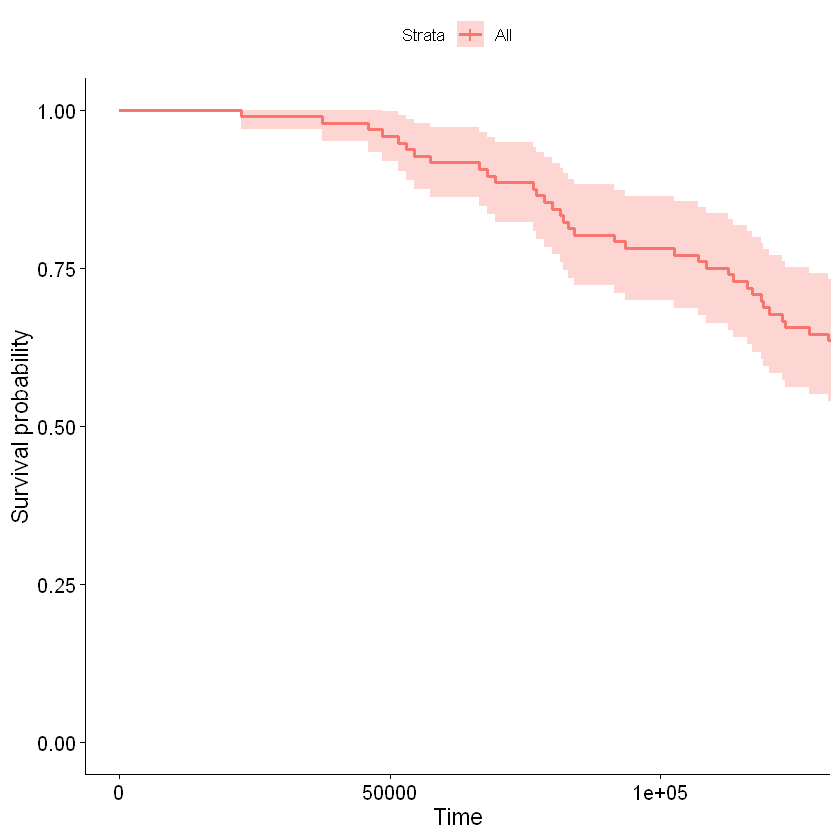

In [5]:
# Kaplan-Meier estimate of the Reliability function 
# with 95% pointwise confidence interval

survfit95 <- survfit(surv~1, data = surv ,conf.int=0.95, #1 pour prendre en compte tous les éléments 
        type="kaplan-meier",
        conf.type="plain")

ggsurvplot(survfit95)

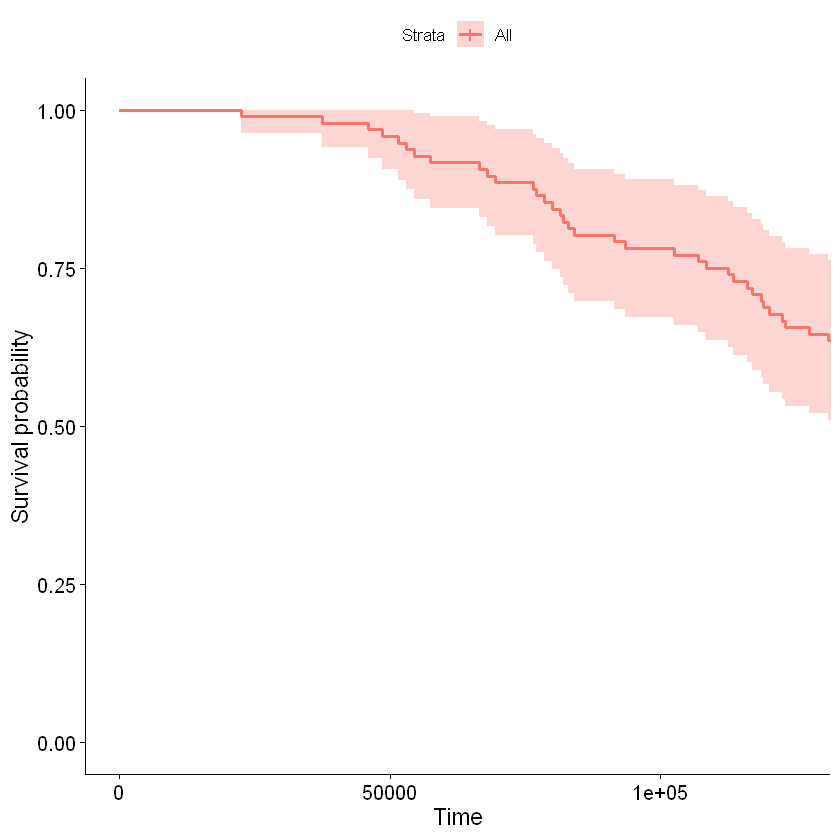

In [6]:
# Pointwise confidence interval of 99%
survfit99 <- survfit(surv~1, data = surv,conf.int=0.99, 
        type="kaplan-meier",
        conf.type="plain")

ggsurvplot(survfit99)

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


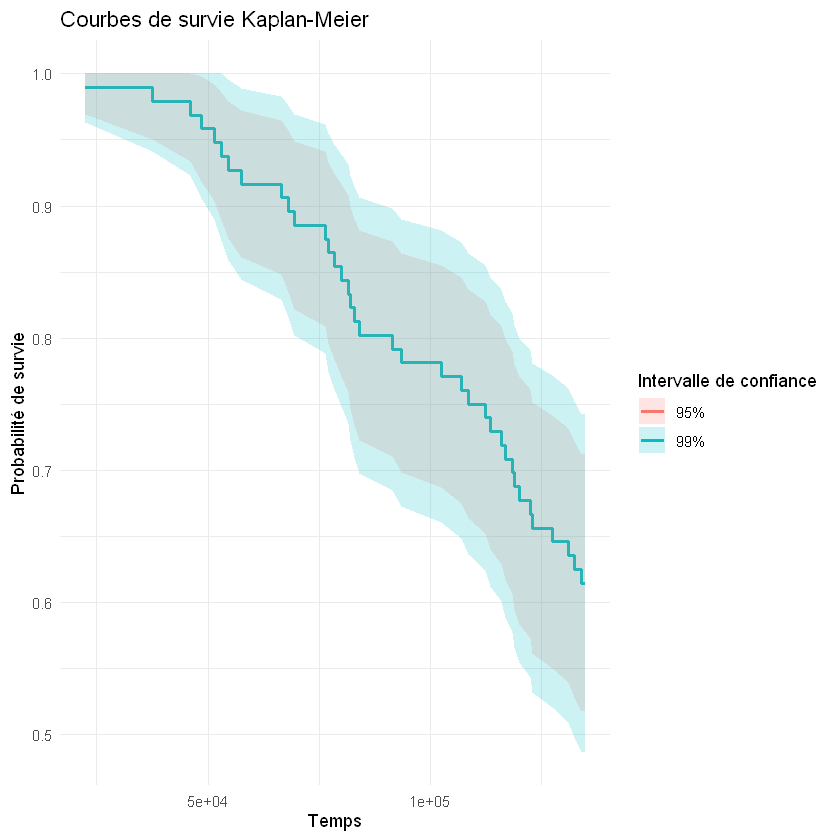

In [7]:
data95 <- as.data.frame(surv_summary(survfit95))
data95$conf_level <- "95%"

data99 <- as.data.frame(surv_summary(survfit99))
data99$conf_level <- "99%"

# Combiner les données
combined_data <- rbind(data95, data99)

# Graphe avec ggplot
ggplot(combined_data, aes(x = time, y = surv, color = conf_level)) +
  geom_step(size = 1) + 
  geom_ribbon(aes(ymin = lower, ymax = upper, fill = conf_level), alpha = 0.2, linetype = 0) +
  labs(title = "Courbes de survie Kaplan-Meier",
       x = "Temps",
       y = "Probabilité de survie",
       color = "Intervalle de confiance",
       fill = "Intervalle de confiance") +
  theme_minimal()

- On observe que l'intervalle est plus grand quand on est a 99% qu'à 95%. Ce résultat est normal car on augmente l'incertitude.

### Question 3: poitwise IC

Using the option $\texttt{conf.type}$, compare the pointwise confidence intervals $\textit{linear}$ and $\textit{log-log}$. The first one has been seen in class, the second is given by:
$$
[R^{1/u(t)}(t), R^{u(t)}(t)]
$$
with
$$
u(t) = z_{1-\alpha/2} \sqrt{\hat{\sigma}^2_\text{GW}}
$$
where $\hat{\sigma}^2_\text{GW}$ is the Greenwood estimator of the asymptotic variance of the Kaplan-Meier (KM) estimator:
$$
\hat{\sigma}^2_\text{GW} = \sum_{i=1}^n \frac{d_i}{n_i(n_i - d_i)}.
$$

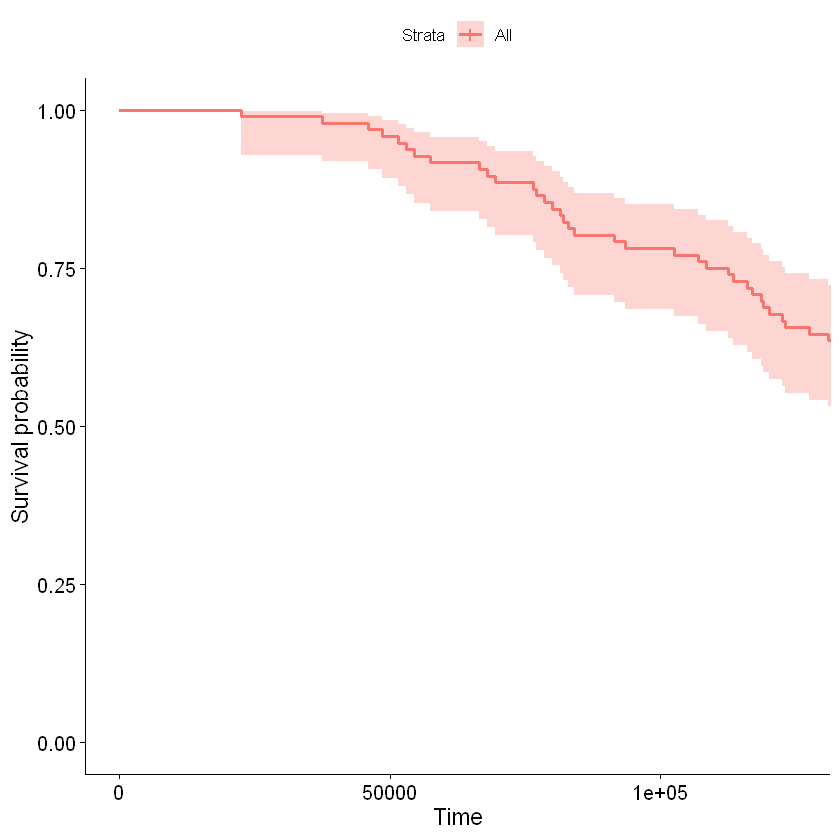

In [8]:
# Log-Log pointwise confidence interval at 95%
survfit_loglog <- survfit(surv~1, data = surv,conf.int=0.95, 
        type="kaplan-meier",
        conf.type="log-log")

ggsurvplot(survfit_loglog)

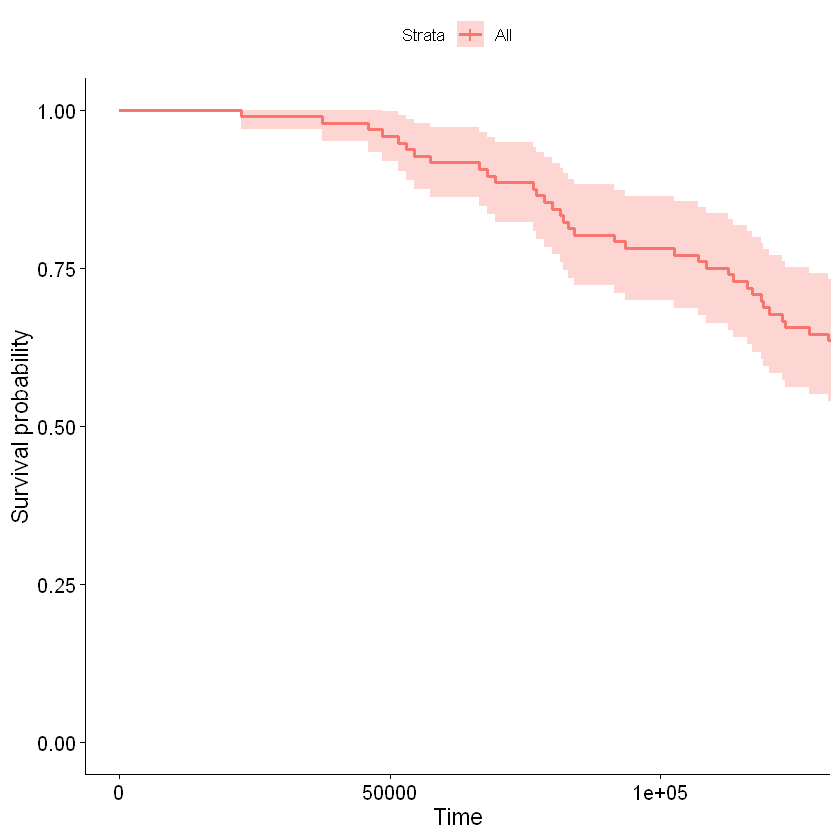

In [9]:
survfit_linear <- survfit(surv~1, data = surv,conf.int=0.95, 
        type="kaplan-meier",
        conf.type="plain")

ggsurvplot(survfit_linear)

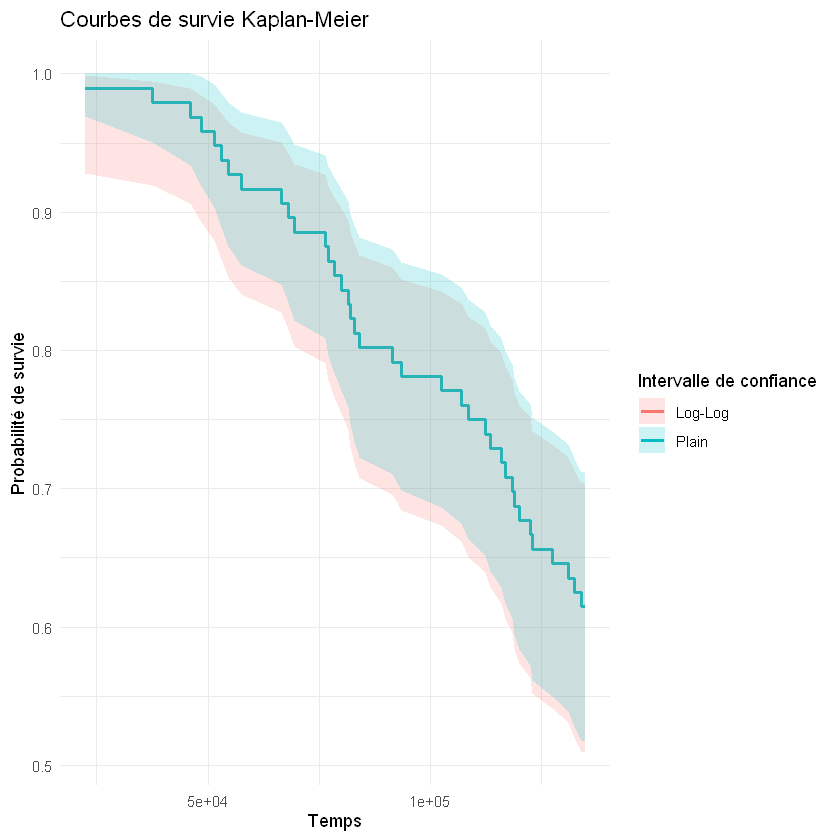

In [10]:
dataloglog <- as.data.frame(surv_summary(survfit_loglog))
dataloglog$conf_type <- "Log-Log"

datalinear <- as.data.frame(surv_summary(survfit_linear))
datalinear$conf_type <- "Plain"  #linéaire

# Combiner les données
combined_data <- rbind(dataloglog, datalinear)

# Graphe avec ggplot
ggplot(combined_data, aes(x = time, y = surv, color = conf_type)) +
  geom_step(size = 1) + 
  geom_ribbon(aes(ymin = lower, ymax = upper, fill = conf_type), alpha = 0.2, linetype = 0) +
  labs(title = "Courbes de survie Kaplan-Meier",
       x = "Temps",
       y = "Probabilité de survie",
       color = "Intervalle de confiance",
       fill = "Intervalle de confiance") +
  theme_minimal()

### Question 4: Kaplan-Meier and the Fleming-Harrington estimates of the Reliability function

Compare the Kaplan-Meier and the Fleming-Harrington estimates of the Reliability function. This latter is given by:
$$
\hat{F}(t) = e^{-\hat{\Lambda}(t)}
$$
where $\hat{\Lambda}(t)$ is the Nelson-Aalen estimator of the cumulative hazard rate function.

Use the option $\texttt{type='fh'}$ to obtain the Fleming-Harrington estimator of the Reliability function.


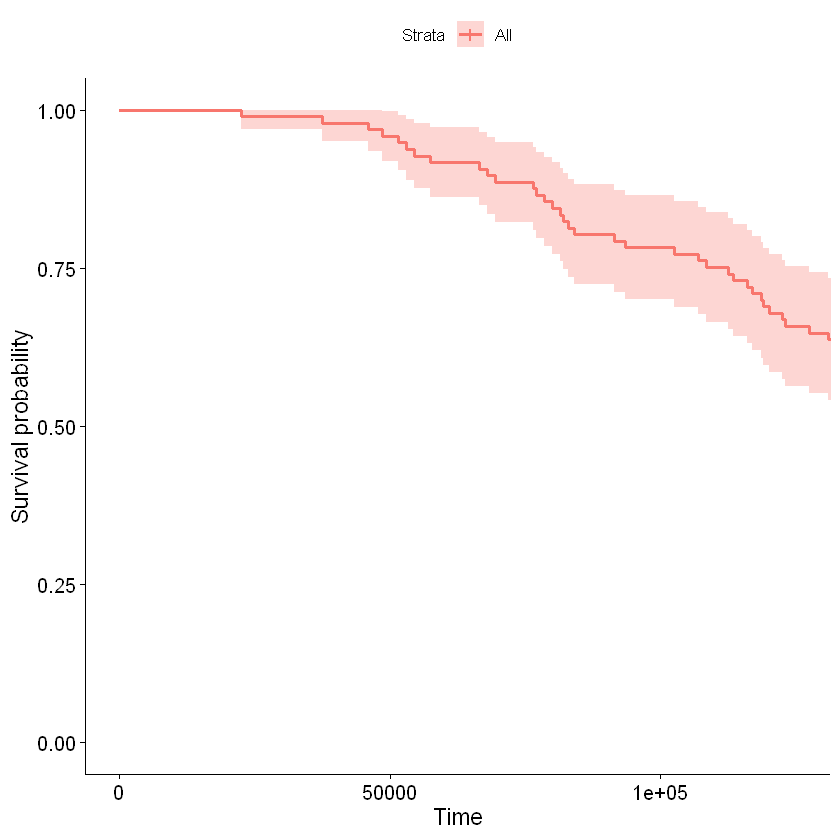

In [11]:
# Fleming-Harringtpn estimate of the reliability function
# with pointwise interval at 95%
survfit_fh <- survfit(surv~1, data = surv,conf.int=0.95, 
        type="fleming-harrington",
        conf.type="plain")

ggsurvplot(survfit_fh)

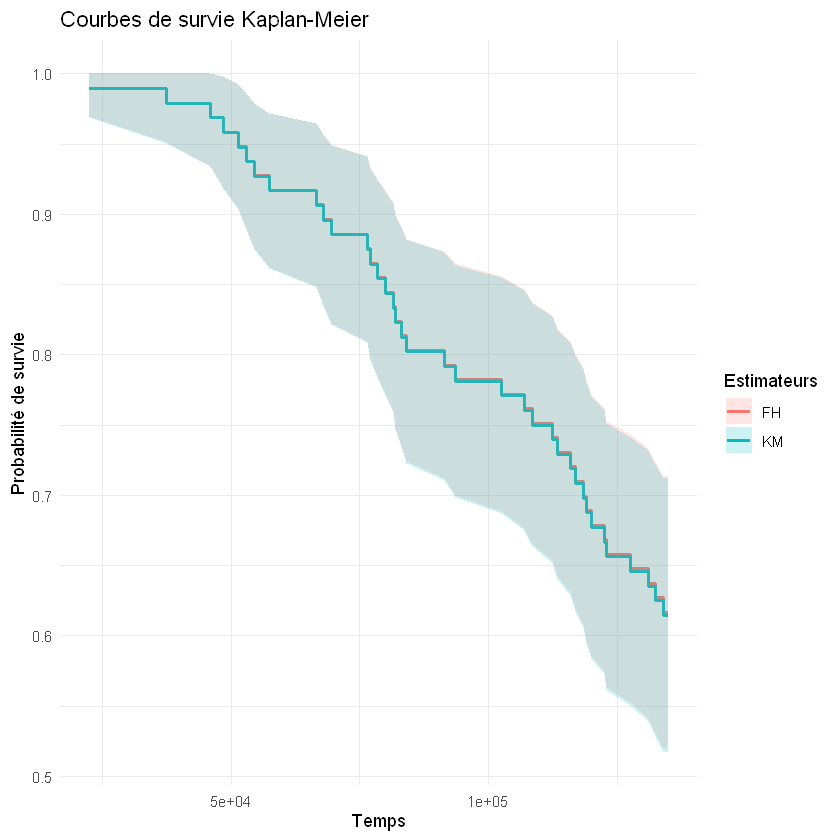

In [12]:
dataloglog <- as.data.frame(surv_summary(survfit_fh))
dataloglog$conf_type <- "FH"

datalinear <- as.data.frame(surv_summary(survfit_linear))
datalinear$conf_type <- "KM"  #linéaire

# Combiner les données
combined_data <- rbind(dataloglog, datalinear)

# Graphe avec ggplot
ggplot(combined_data, aes(x = time, y = surv, color = conf_type)) +
  geom_step(size = 1) + 
  geom_ribbon(aes(ymin = lower, ymax = upper, fill = conf_type), alpha = 0.2, linetype = 0) +
  labs(title = "Courbes de survie Kaplan-Meier",
       x = "Temps",
       y = "Probabilité de survie",
       color = "Estimateurs",
       fill = "Estimateurs") +
  theme_minimal()

- Les deux estimateurs ont les mêmes propriétés théoriques 

### Question 5:  confidence band

**Pointwise interval :** on calcule l'intervalle pour t fixé, point par point. C'est la survfit méthode. 

**Band interval :** on cherche une fonction inf et une fonction sup qui encadrent pour tout t R(.), fonction km.ci. 

The function can produce simultaneous confidence bands, too. The Hall-Wellner band (1980) and the Equal Precision band by Nair (1984) together with their log-transformed counterpart. From all simultaneous confidence intervals only the log-transformed Equal Precision "logep" band can be recommended. The limits are computed according to the statistical tables in Klein and Moeschberger (2002).

In [13]:
library(km.ci)

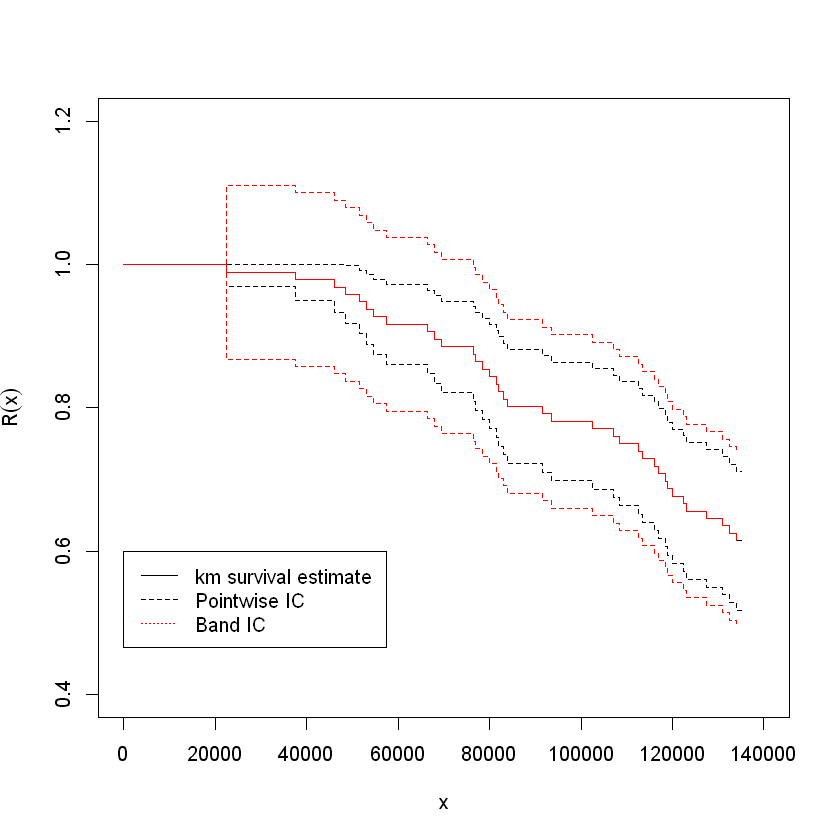

In [14]:
# Pointwise interval
survfit_km<- survfit(surv~1, data = surv,
        type="kaplan-meier",
        conf.type="plain")
# Band interval : "Hall-Wellner" permet de faire un band confidence interval
km <- km.ci(survi = survfit_km, conf.level = 0.95, method = "hall-wellner")

# Affichage des 2 intervalles
plot(survfit_km,xlab=expression(x),ylab=expression(R(x)),ylim=c(0.4,1.2),xlim=c(0,140000))
par(new=TRUE)
plot(km,xlab=expression(x),ylab=expression(R(x)),ylim=c(0.4,1.2),xlim=c(0,140000),col="red")
legend(0,0.6,legend=c("km survival estimate","Pointwise IC","Band IC"),col=c("black","black","red"), lty=1:3)

- On observe bien que la methode bande nous donne un intervall de confiance plus large et contient l'intervalle calculé par la methode pointwise. 

**Attention** il faut utiliser la methode hall-wellner sinon ca marche plus. En effet, cette méthode permet de calculer un intervalle par bande sinon les autres méthodes font du pointwise.

### Question 6: comparison full censored dataset vs only failure times considered.

Compare the estimations obtained when one considers the full censored dataset and when only the failure times are considered.


In [15]:
# Full censored dataset
survfit_full <- survfit(surv~1, data = surv,conf.int=0.95, 
        type="kaplan-meier",
        conf.type="plain")

# Only failure times dataset
data_nc <- data[data$TAG == 1,]
surv_nc <- Surv(data_nc$MILES,data_nc$TAG)

survfit_times <- survfit(surv_nc~1, data = data_nc,conf.int=0.95, 
        type="kaplan-meier",
        conf.type="plain")

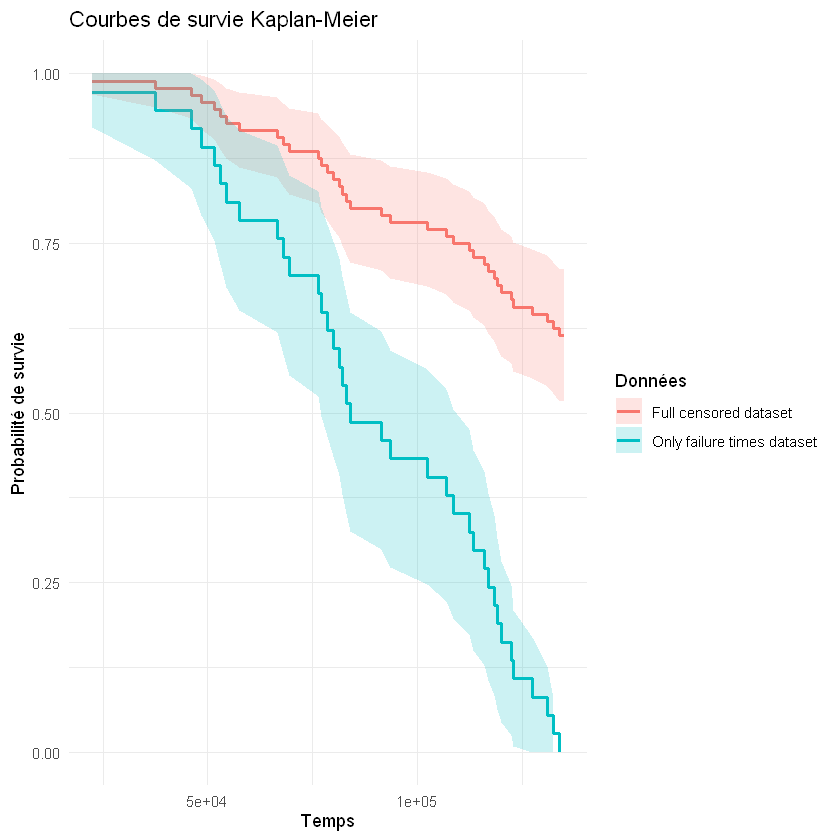

In [16]:
datafull <- as.data.frame(surv_summary(survfit_full))
datafull$conf_type <- "Full censored dataset"

datatimes <- as.data.frame(surv_summary(survfit_times))
datatimes$conf_type <- "Only failure times dataset"  #linéaire

# Combiner les données
combined_data <- rbind(datafull, datatimes)

# Graphe avec ggplot
ggplot(combined_data, aes(x = time, y = surv, color = conf_type)) +
  geom_step(size = 1) + 
  geom_ribbon(aes(ymin = lower, ymax = upper, fill = conf_type), alpha = 0.2, linetype = 0) +
  labs(title = "Courbes de survie Kaplan-Meier",
       x = "Temps",
       y = "Probabilité de survie",
       color = "Données",
       fill = "Données") +
  theme_minimal()

**Observation :**

- Si on garde que les données non censurées, notre estimateur n'est pas le bon. On estime plus la fonction de répartition mais la fonction de répartition restreinte à nos données non censurées. 

- On voit bien qu'on a pas de convergence pour la courbe bleue alors que la courbe rouge oui.


### Question 7:  estimate of the median and expectation of the lifetime

The median of the time-to-failure distribution, denoted as $ t_{\text{med}} $, is the time at which the Reliability function $ R(t) $ satisfies:
$$
R(t_{\text{med}}) = 0.5.
$$

The Reliability function $ R(t) $ is defined as:
$$
R(t) = P(T > t),
$$
where $ T $ is the random variable representing the time to failure.

Thus, the median $ t_{\text{med}} $ can be obtained by solving:
$$
P(T > t_{\text{med}}) = 0.5,
$$
or equivalently:
$$
\int_{t_{\text{med}}}^{\infty} f(t) \, dt = 0.5,
$$
where $ f(t) $ is the probability density function of $ T $.

In [17]:
# Full censored dataset
km <- km.ci(survi = survfit_km, conf.level = 0.95, method = "hall-wellner")
print(km,print.rmean=TRUE)

Call: survfit(formula = surv ~ 1, data = surv, type = "kaplan-meier", 
    conf.type = "plain")

      n events rmean* se(rmean) median 0.95LCL 0.95UCL
[1,] 96     37 116807      2917     NA  134000      NA
    * restricted mean with upper limit =  134000 


**Full censored dataset :**

Expectation of the lifetime = 116 807

Estimate of the median = NA

- On a vu d'après les questions précédentes que la fonction de Reliability ne descendait pas en dessous de 0.5 lorsqu'on a toutes les données (censurées et non censurées) donc on ovtient un NA pour l'estimation de la médianne. 

In [18]:
# Only failure times observed
km_nc <- km.ci(survi = survfit_times, conf.level = 0.95, method = "hall-wellner")
print(km_nc,print.rmean=TRUE)

Call: survfit(formula = surv_nc ~ 1, data = data_nc, conf.int = 0.95, 
    type = "kaplan-meier", conf.type = "plain")

      n events rmean* se(rmean) median 0.95LCL 0.95UCL
[1,] 37     36  89351      4913  84000   69500  116000
    * restricted mean with upper limit =  132500 


**Only failure times observed :**

Expectation of the lifetime = 89 351

Estimate of the median = 84 000

La limite supérieure restreinte est de 132500. 

Cela signifie que le temps moyen de survie restreint ($\text{rmean} = 89351$) a été calculé en intégrant la courbe de survie $S(t)$ de $t = 0 $ à $ t = 132500 $:
$$
\text{rmean} = \int_0^{132500} S(t) \, dt.
$$

Si la limite supérieure était plus grande ou plus petite, la valeur de $ \text{rmean} $ changerait car elle inclurait une plus grande ou une plus petite aire sous la courbe.


### Question 8 : Nelson-Aalen estimates of the cumulative hazard rate function

Let's recall that the Fleming-Harrington estimates of the Reliability function is given by:
$$
\hat{F}(t) = e^{-\hat{\Lambda}(t)}
$$
where $\hat{\Lambda}(t)$ is the Nelson-Aalen estimator of the cumulative hazard rate function.

In [19]:
library(mice)


Attachement du package : 'mice'


L'objet suivant est masqué depuis 'package:stats':

    filter


Les objets suivants sont masqués depuis 'package:base':

    cbind, rbind




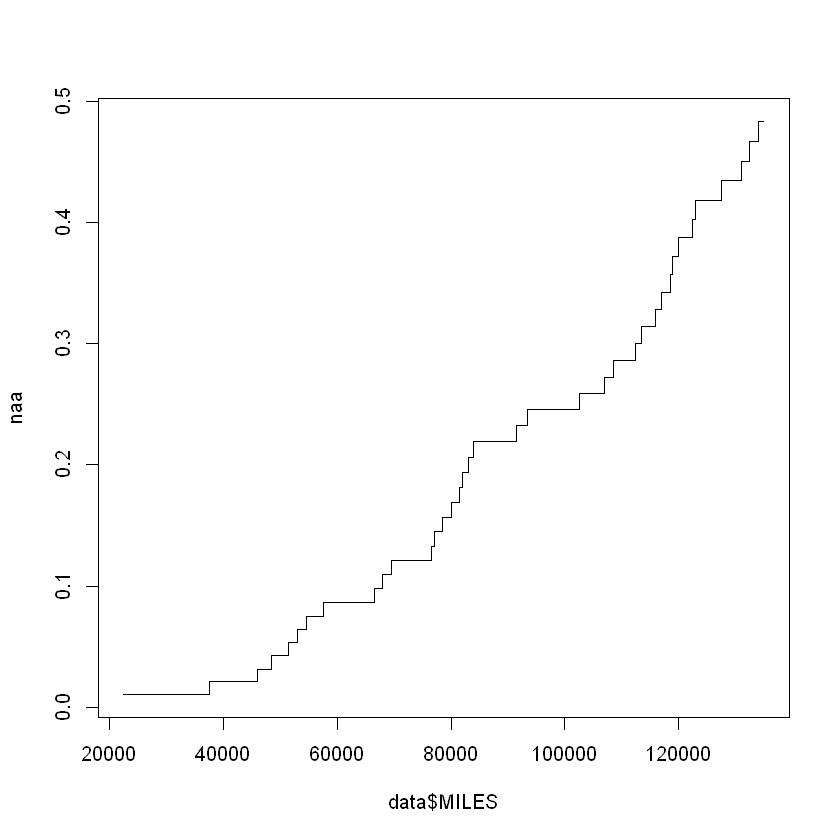

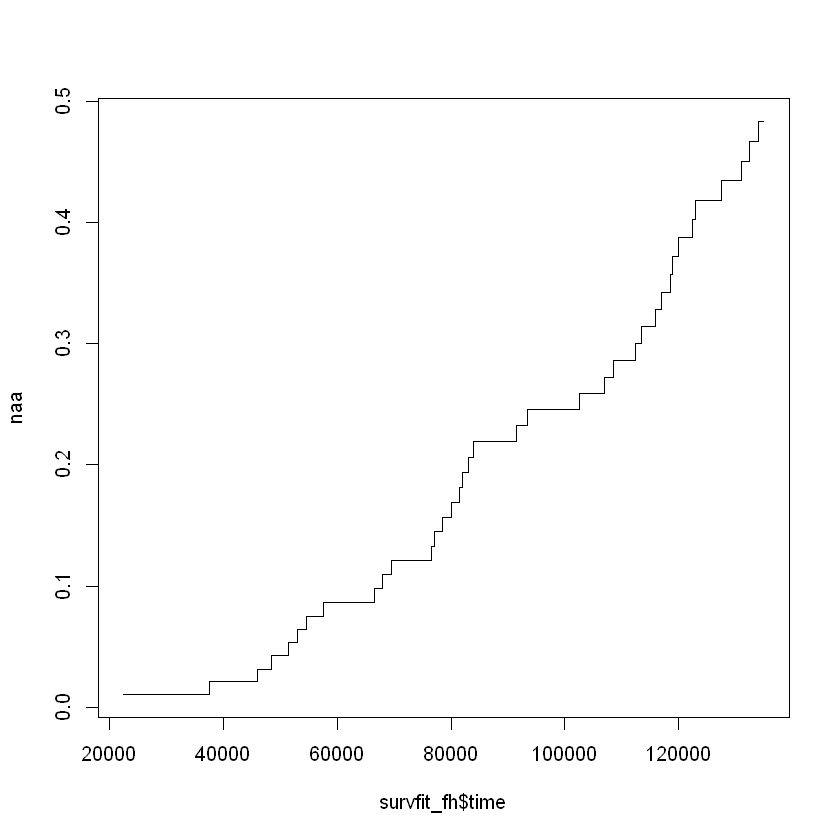

In [20]:
# already computed Nelson-Aalen estimator
naa <- nelsonaalen(data, MILES, TAG)
plot(data$MILES,naa,type='s')

# a partir du Flemming-Harrington estimate of R
naa <- -log(survfit_fh$surv) # inverse de la fonction estimateur de KM
plot(survfit_fh$time,naa,type='s')

- On obtient bien les mêmes résultats

**Comparaison Nelson-Aalen vs  Kaplan-Meier estimator :**

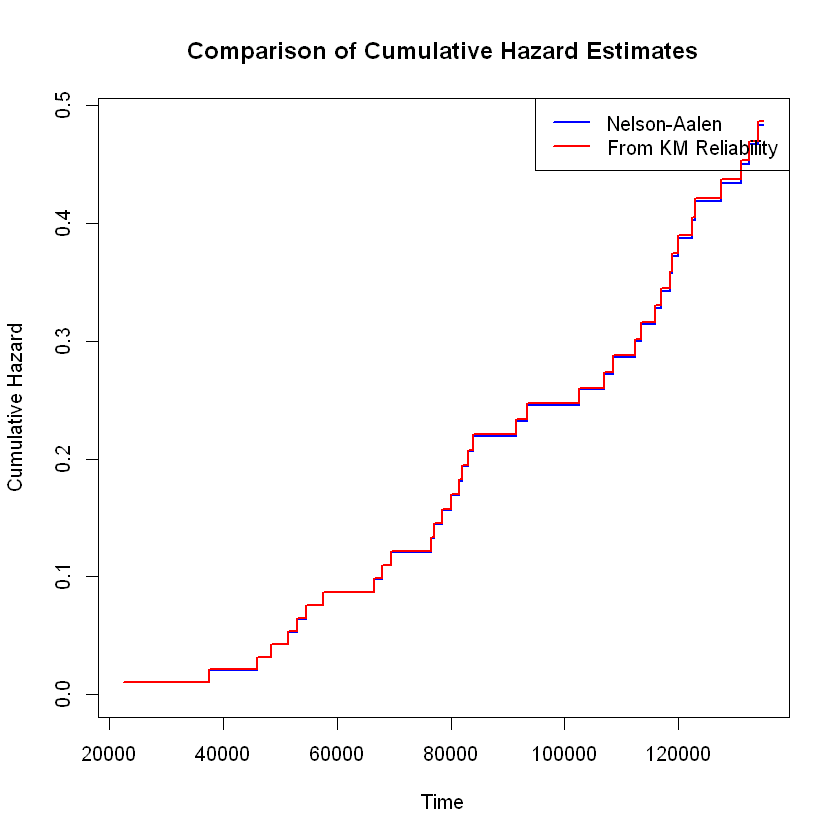

In [21]:
# Nelson-Aalen estimator
na_cumulative_hazard <- survfit_fh$cumhaz  # Nelson-Aalen cumulative hazard

# Kaplan-Meier estimator
km_reliability <- survfit_full$surv  # Kaplan-Meier Reliability function
km_cumulative_hazard <- -log(km_reliability)  # Derived cumulative hazard from KM

# Time points
time_points <- survfit_km$time

# Plot the cumulative hazard estimates
plot(
  time_points, na_cumulative_hazard,
  type = "s", col = "blue", lwd = 2, ylim = c(0, max(na_cumulative_hazard, km_cumulative_hazard)),
  xlab = "Time", ylab = "Cumulative Hazard", main = "Comparison of Cumulative Hazard Estimates"
)
lines(
  time_points, km_cumulative_hazard,
  type = "s", col = "red", lwd = 2
)

legend(
  "topright",
  legend = c("Nelson-Aalen", "From KM Reliability"),
  col = c("blue", "red"), lwd = 2
)

- C'est bien les mêmes. (juste les plots pas centrés pareils)

- Grand lambda = cum

- Convexe => petit_lmabda croissante (petit_lambda prime >0). 

## Question 9 :  estimation of the hazard rate

In [22]:
#install.packages("muhaz")
library(muhaz)

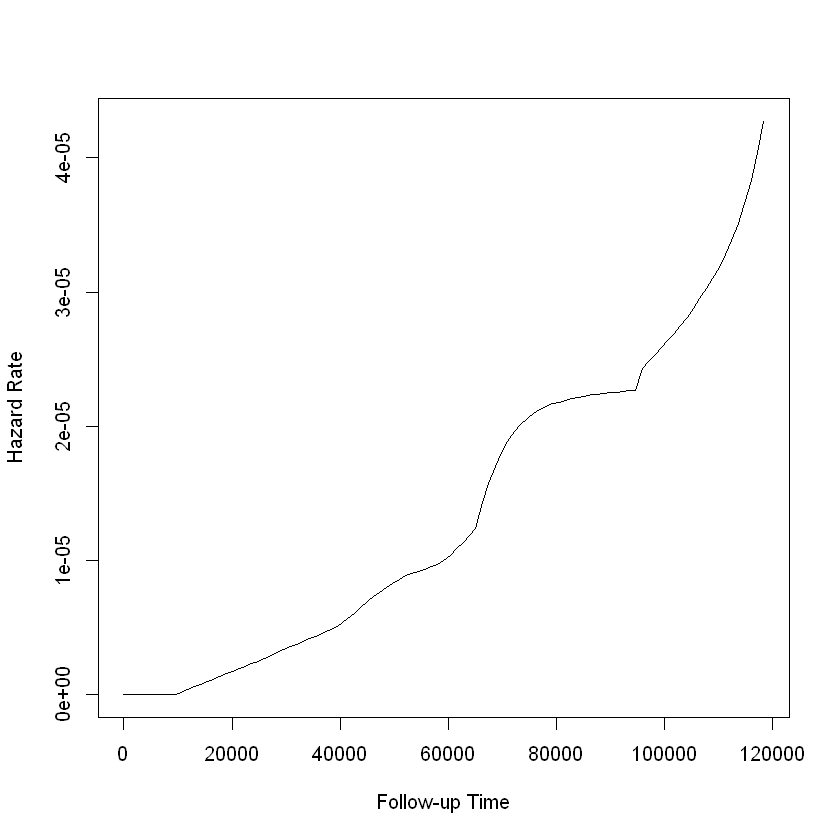

In [23]:
# smooth estimation of the hazard rate.

muh <- muhaz(survfit_fh$time, survfit_fh$n.event) #petit lambda pas cumulé, lissé
plot(muh)

- Au temps t_i on affiche quel est le rique d'avoir une panne sur une machine qui est encore en marche à ce moment là. Loi IFR, croissante : plus on avance dans le temps plus le matériel se dégrade. 

## Exercice 2 :  compare the estimates of the Reliability with the theoretical one when the sample size or the percentage of censoring change

In [24]:
#install.packages('evd')
library(evd)

### Création des échantillons et plot avec différentes valeurs de n et différentes censures 

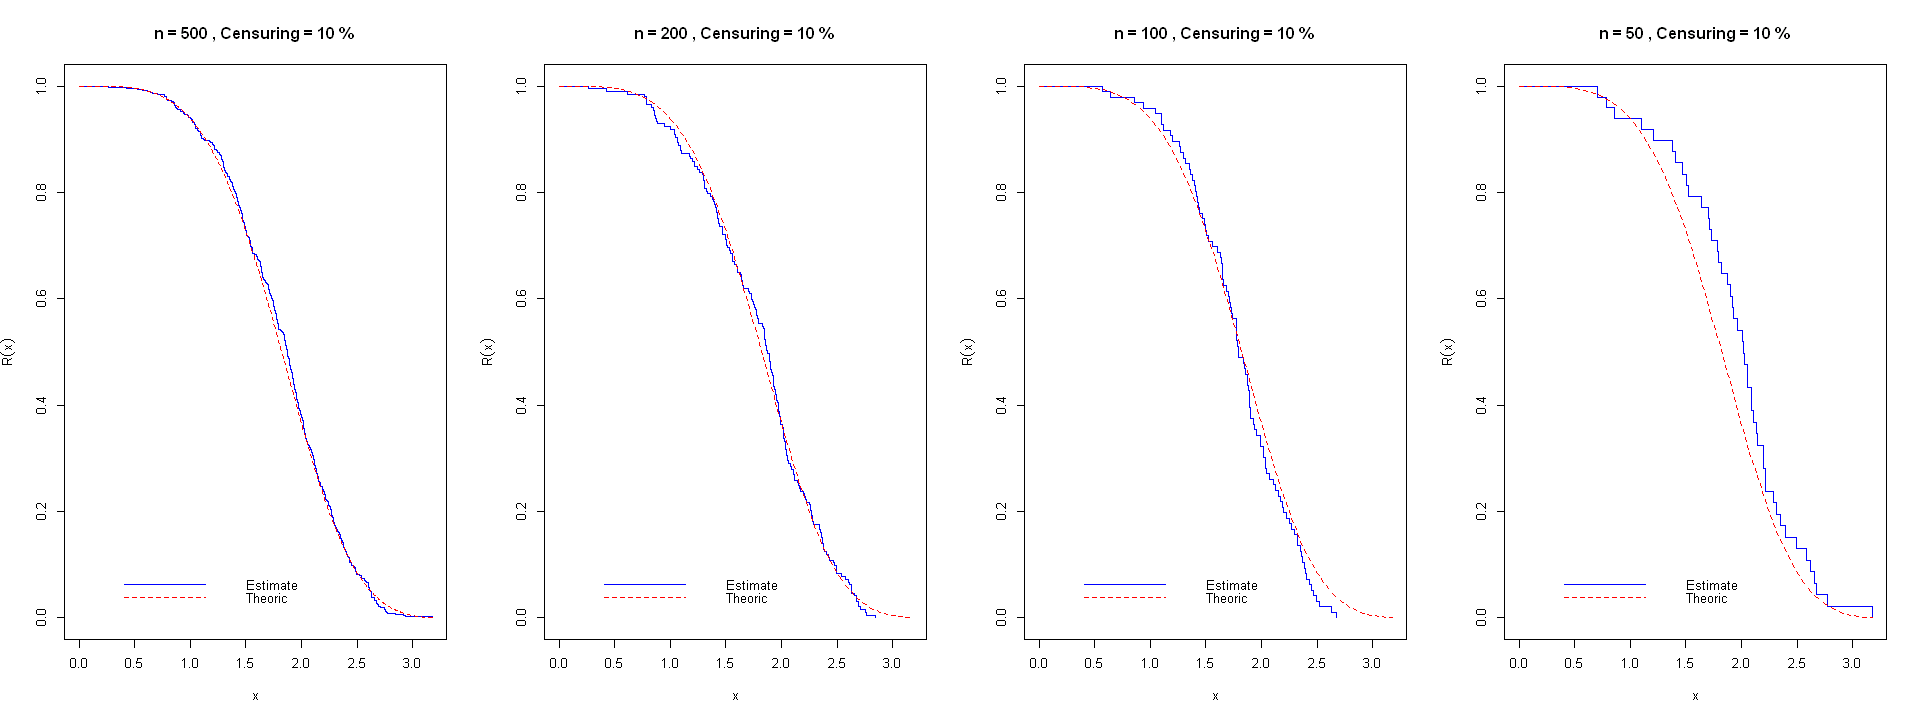

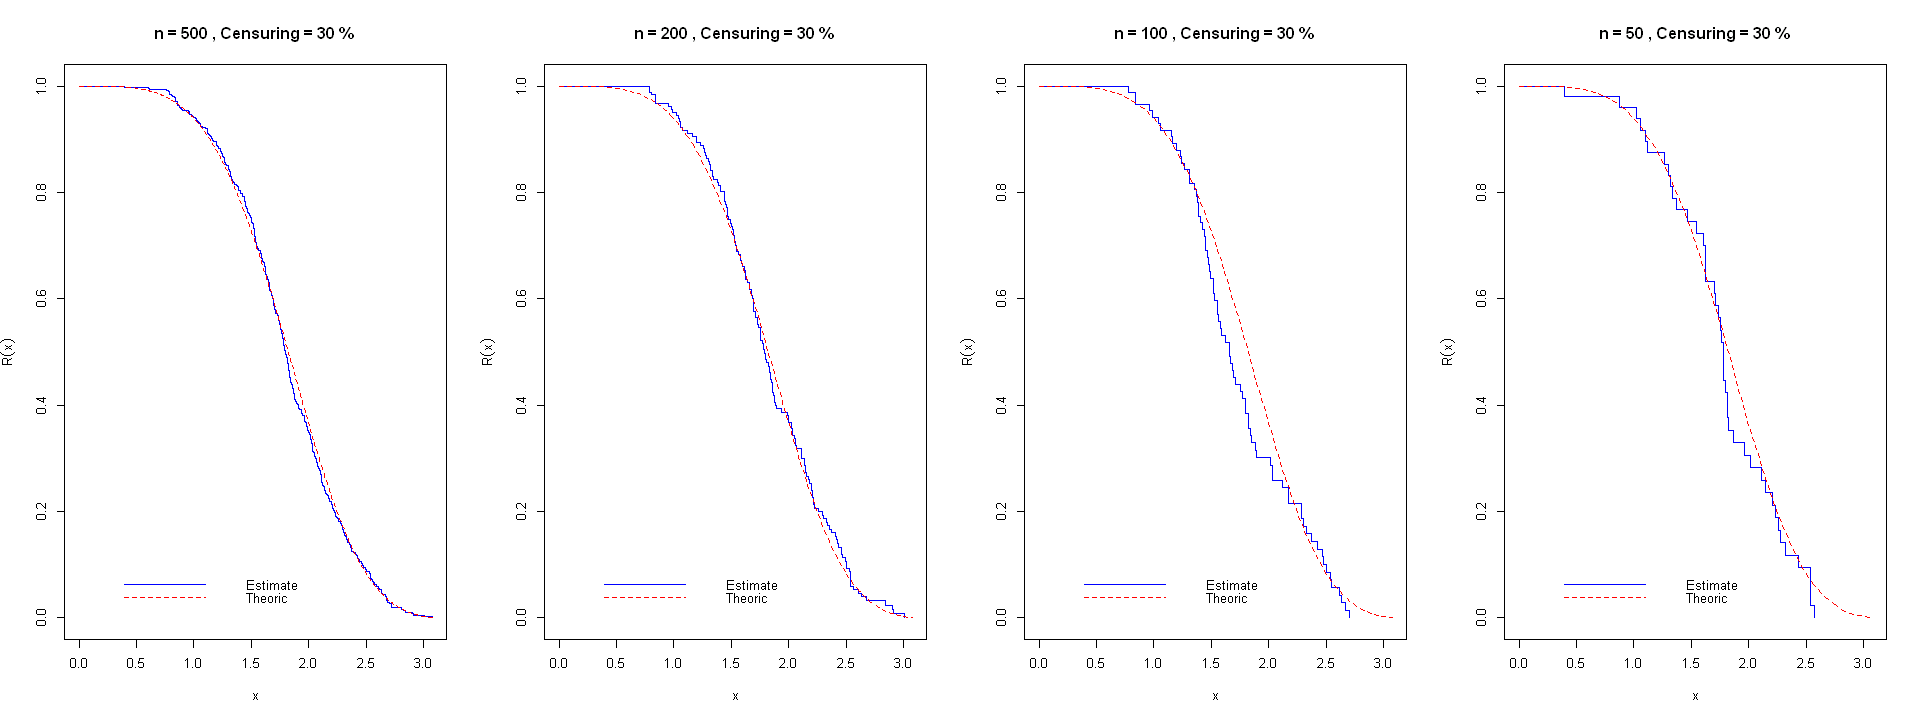

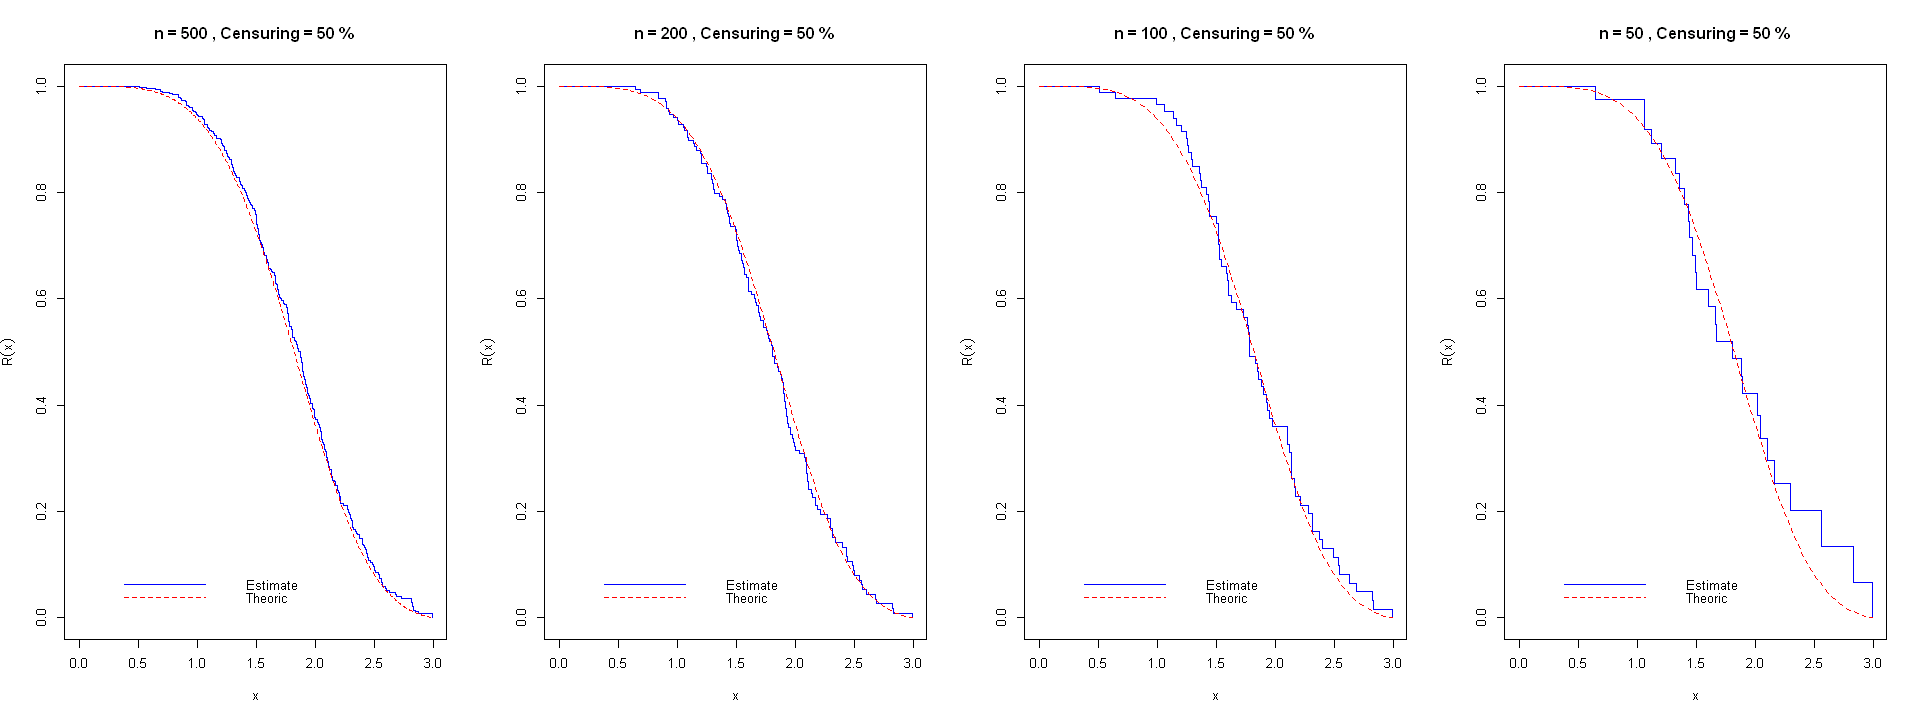

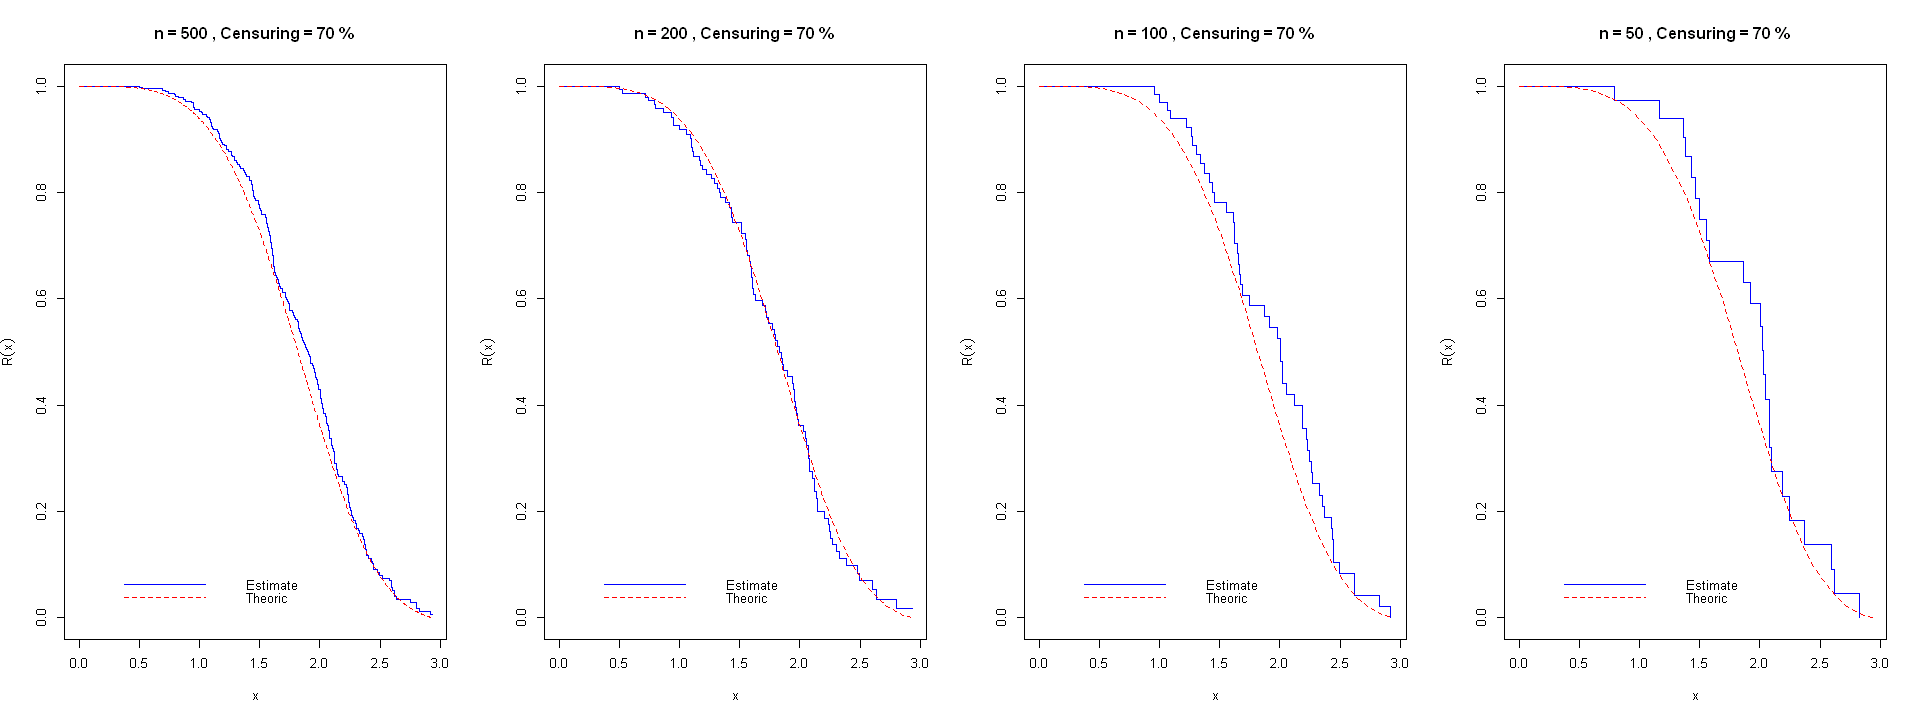

In [35]:
# Paramètres des taux de censure
e <- c(0.03, 0.105, 0.22, 0.4)  # Taux de censure
sample_sizes <- c(50, 100, 200, 500)  # Tailles d'échantillon
censures <- c(10,30,50,70) 

# Préparation pour les graphiques
options(repr.plot.width = 16, repr.plot.height = 6)

for (censoring_idx in seq_along(e)) {
  lambda <- e[censoring_idx]
  censure <-   censures[censoring_idx]
  # Simulation des données
  X <- rweibull(500, shape = 4, scale = 2)
  C <- rexp(500, rate = lambda)
  T <- pmin(X, C)  # Temps observés
  event <- as.numeric(X <= C)  # Indicateurs d'événement
  surv_data <- Surv(T, event)
  
  # Calcul de la fonction de fiabilité théorique
  T_vals <- seq(0, max(T), length.out = 500)
  R <- exp(-(T_vals / 2)^4)
  
  # Initialisation des graphiques pour une ligne
  par(mfrow = c(1, 4))
  
  for (n in rev(sample_sizes)) {  # Graphiques pour les tailles d'échantillon
    sampled_indices <- sample(1:500, n)
    sampled_surv <- surv_data[sampled_indices]
    km_fit <- survfit(sampled_surv ~ 1, type = "kaplan-meier")
    
    T_sample <- seq(0, max(T), length.out = n)
    R_sample <- exp(-(T_sample / 2)^4)
    
    # Plot Kaplan-Meier
    plot(
      km_fit, xlab = expression(x), ylab = expression(R(x)),
      col = "blue", xlim = c(0, max(T_sample)), lty = 1, conf.int = FALSE
    )
    
    # Ajouter la courbe théorique
    par(new = TRUE)
    plot(
      T_sample, R_sample, xlab = "", ylab = "",
      col = "red", xlim = c(0, max(T_sample)), type = "l", lty = 2, axes = FALSE
    )
    
    # Ajouter la légende
    legend(
      "bottomleft", legend = c("Estimate", "Theoric"),
      col = c("blue", "red"), lty = 1:2, bty = "n", inset = c(0.05, 0.05)
    )
    
    # Titre pour le graphique
    title(main = paste("n =", n, ", Censuring =",censure , "%"))
  }
}


- Plus l'échantillon est grand pour l'estimation de R est bonne
- Augmenter le pourcentage de censoring diminue la qualité de l'estimation

## Exercice 3

In [36]:
# Téléchargement des data set 

bmt <- read.csv2(file = "bmt.csv", header = TRUE, sep = ';')
tongue <- read.csv2(file = "tongue.csv", header = TRUE, sep = ';')

In [37]:
head(bmt)

,ID,group,t1,t2,d1,d2,d3,ta,da,tc,⋯,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,2081,2081,0,0,0,67,1,121,⋯,26,33,1,0,1,1,98,0,1,0
2,2,1,1602,1602,0,0,0,1602,0,139,⋯,21,37,1,1,0,0,1720,0,1,0
3,3,1,1496,1496,0,0,0,1496,0,307,⋯,26,35,1,1,1,0,127,0,1,0
4,4,1,1462,1462,0,0,0,70,1,95,⋯,17,21,0,1,0,0,168,0,1,0
5,5,1,1433,1433,0,0,0,1433,0,236,⋯,32,36,1,1,1,1,93,0,1,0
6,6,1,1377,1377,0,0,0,1377,0,123,⋯,22,31,1,1,1,1,2187,0,1,0


In [38]:
head(tongue)

,X,type,time,delta
,<int>,<int>,<int>,<int>
1,1,1,1,1
2,2,1,3,1
3,3,1,3,1
4,4,1,4,1
5,5,1,10,1
6,6,1,13,1


### Etude du data set BMT

#### Question 1 : Nelson-Aalen estimate of the cumulative hazard rate function

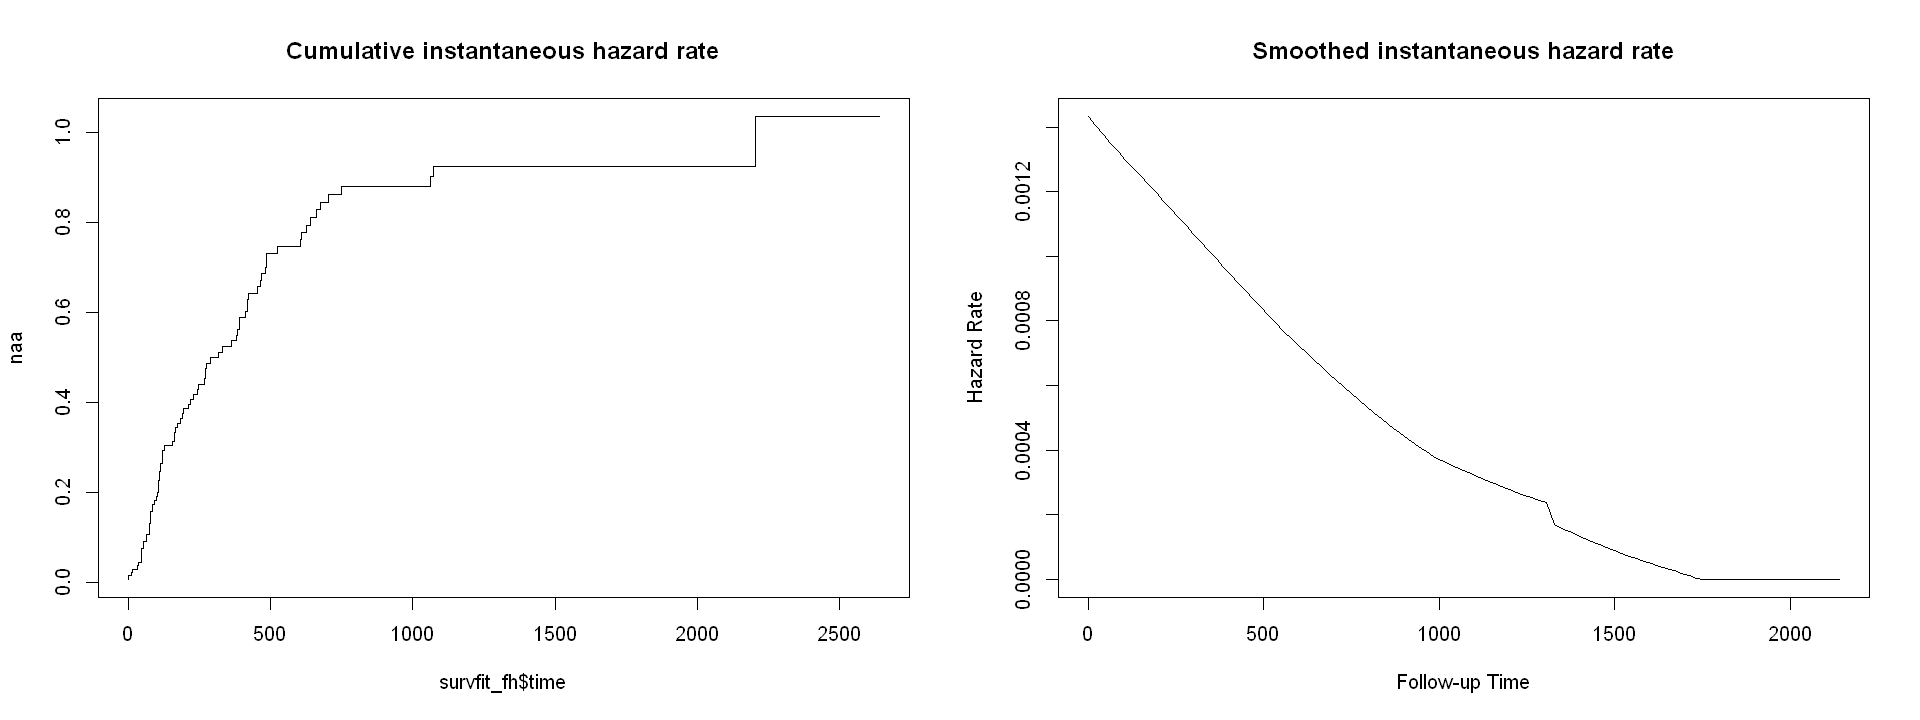

In [40]:
surv = Surv(bmt$t2,bmt$d3)

# On fait flemming-harrington pour avoir estimateur nelson-aalen
survfit_fh <- survfit(surv~1, data = surv,conf.int=0.95, 
        type="fleming-harrington",
        conf.type="plain")

# Estimateur de Nelson-Aalen
naa <- -log(survfit_fh$surv) 

muh <- muhaz(survfit_fh$time, survfit_fh$n.event==1) 

par(mfrow = c(1, 2)) 
options(repr.plot.width = 16, repr.plot.height = 6)

plot(survfit_fh$time,naa,type='s',main = "Cumulative instantaneous hazard rate")
plot(muh, main = "Smoothed instantaneous hazard rate")

- On voit que notre Nelson-Aalen semble concave. Donc on s'attend à ce que ca dériée seconde soit négative et donc sa dérivée première soit décroissante. On voit bien que la dérivée première (muhaz) est décroissante.

#### Question 2 : Hazard Plotting method to check adequacy to models (exponential, Weibull, Log-normal) 

**Création des models :**

In [41]:
# Transformation de la survie pour les modèles
time <- survfit_fh$time
survival_prob <- survfit_fh$surv

# Transformation pour Exponentielle : time en fonction de naa
exp_model <- lm(time ~ naa)

# Transformation pour Weibull : log(-log(survival)) vs log(time)
log_log_survival <- log(-log(survival_prob))
log_time <- log(time)
weibull_model <- lm(log_time ~ log_log_survival)

# Transformation pour Log-normal : log(survival) vs log(time)
norm_survival <- qnorm(survival_prob)
lognormal_model <- lm(log_time ~ norm_survival)


**Affichage des résultats :**

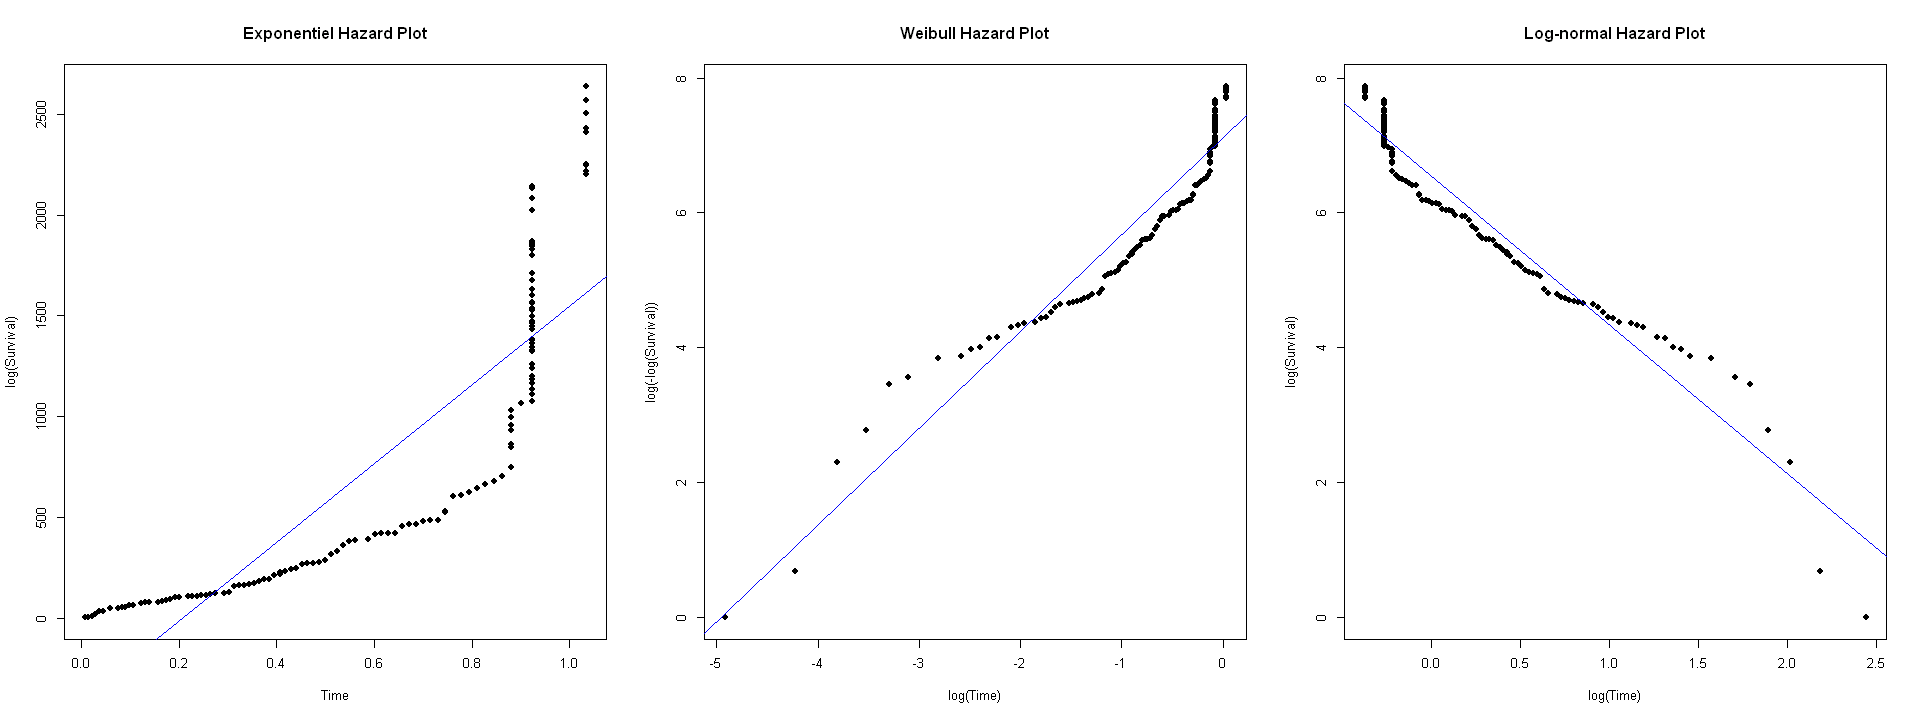

In [42]:
# Tracer les résultats
par(mfrow = c(1, 3)) 
options(repr.plot.width = 16, repr.plot.height = 6)

# Exponentiel - Tracer le graphique et ajouter la ligne y = x
plot(naa,time, main = "Exponentiel Hazard Plot", xlab = "Time", ylab = "log(Survival)", pch = 16)
abline(exp_model, col = "blue")

# Weibull - Tracer le graphique et ajouter la ligne y = x
plot(log_log_survival, log_time,main = "Weibull Hazard Plot", xlab = "log(Time)", ylab = "log(-log(Survival))", pch = 16)
abline(weibull_model, col = "blue")

# Log-normal - Tracer le graphique et ajouter la ligne y = x
plot(norm_survival, log_time, main = "Log-normal Hazard Plot", xlab = "log(Time)", ylab = "log(Survival)", pch = 16)
abline(lognormal_model, col = "blue")

- Nos données ont l'air de suivre une log-normal d'après le graphe ci-dessus. Nous pouvons vérifier en affichant les coefficients R2.

**Calcul des scores R2 :**

In [43]:
print(paste("Model exp : ",summary(exp_model)$r.squared))
print(paste("Model weibull : ",summary(weibull_model)$r.squared))
print(paste("Model lognormal : ",summary(lognormal_model)$r.squared))

[1] "Model exp :  0.740815953186208"
[1] "Model weibull :  0.918134608802446"
[1] "Model lognormal :  0.943768765261216"


#### Question 3 : log-loglogistic

**Création du model :**

In [44]:
# Exemple de données
time <- survfit_fh$time
survival_prob <- survfit_fh$surv

# Transformation pour log-logistique
log_log_survival <- log(survival_prob/(1-survival_prob))
log_time <- log(time)

# Ajustement d'un modèle linéaire log-logistique
loglog_model <- lm(log_time ~ log_log_survival)

# Estimer les paramètres alpha et beta de la log-logistique à partir du modèle
alpha <- exp(coef(loglog_model)[1])  # Estimation de alpha
beta <- coef(loglog_model)[2]        # Estimation de beta


**Plot des résultats :**

Estimated alpha:  702.0934 
Estimated beta:  -1.243641 
R2 :  0.9403149

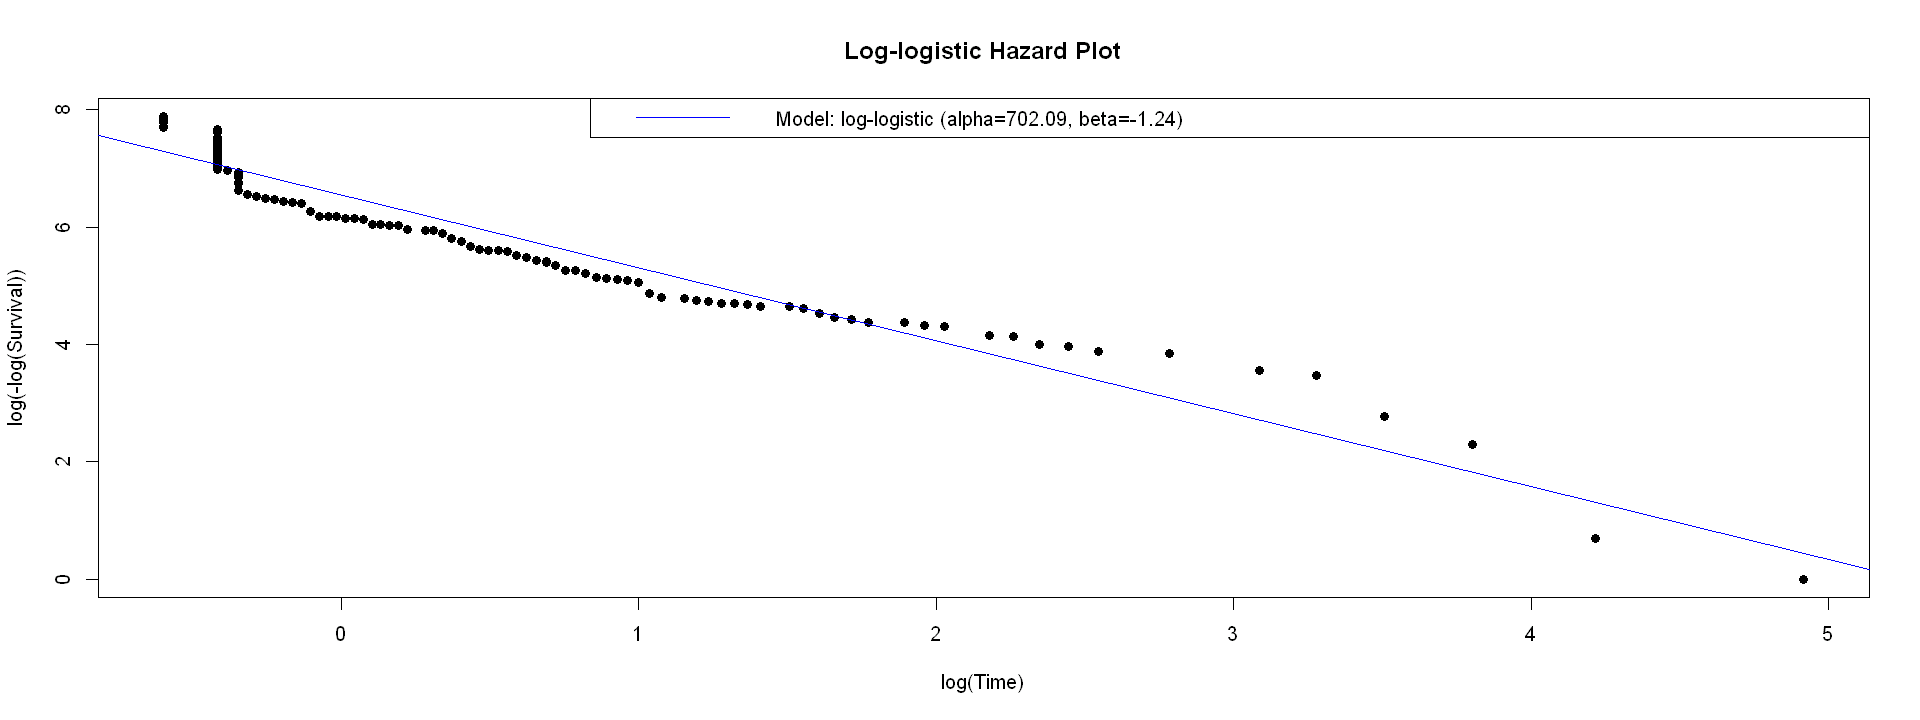

In [47]:
# Tracer la courbe de Hazard Plot (log-logistique)
par(mfrow = c(1, 1))
plot(log_log_survival, log_time, main = "Log-logistic Hazard Plot", 
     xlab = "log(Time)", ylab = "log(-log(Survival))", pch = 16)
abline(loglog_model, col = "blue")

# Ajouter une légende
legend("topright", legend = paste("Model: log-logistic (alpha=", round(alpha, 2), ", beta=", round(beta, 2), ")", sep=""), 
       col = "blue", lty = 1)

# Affichage des paramètres estimés
cat("Estimated alpha: ", alpha, "\n")
cat("Estimated beta: ", beta, "\n")
cat("R2 : ",summary(loglog_model)$r.squared)

**Conclusion :**

- Finallement, le model lognormal est celui obtenant le meilleur score R2. C'est donc celui qui devrait être choisit pour ce dataset. 

### TONGUE

#### Question 1 : Nelson-Aalen estimate of the cumulative hazard rate function

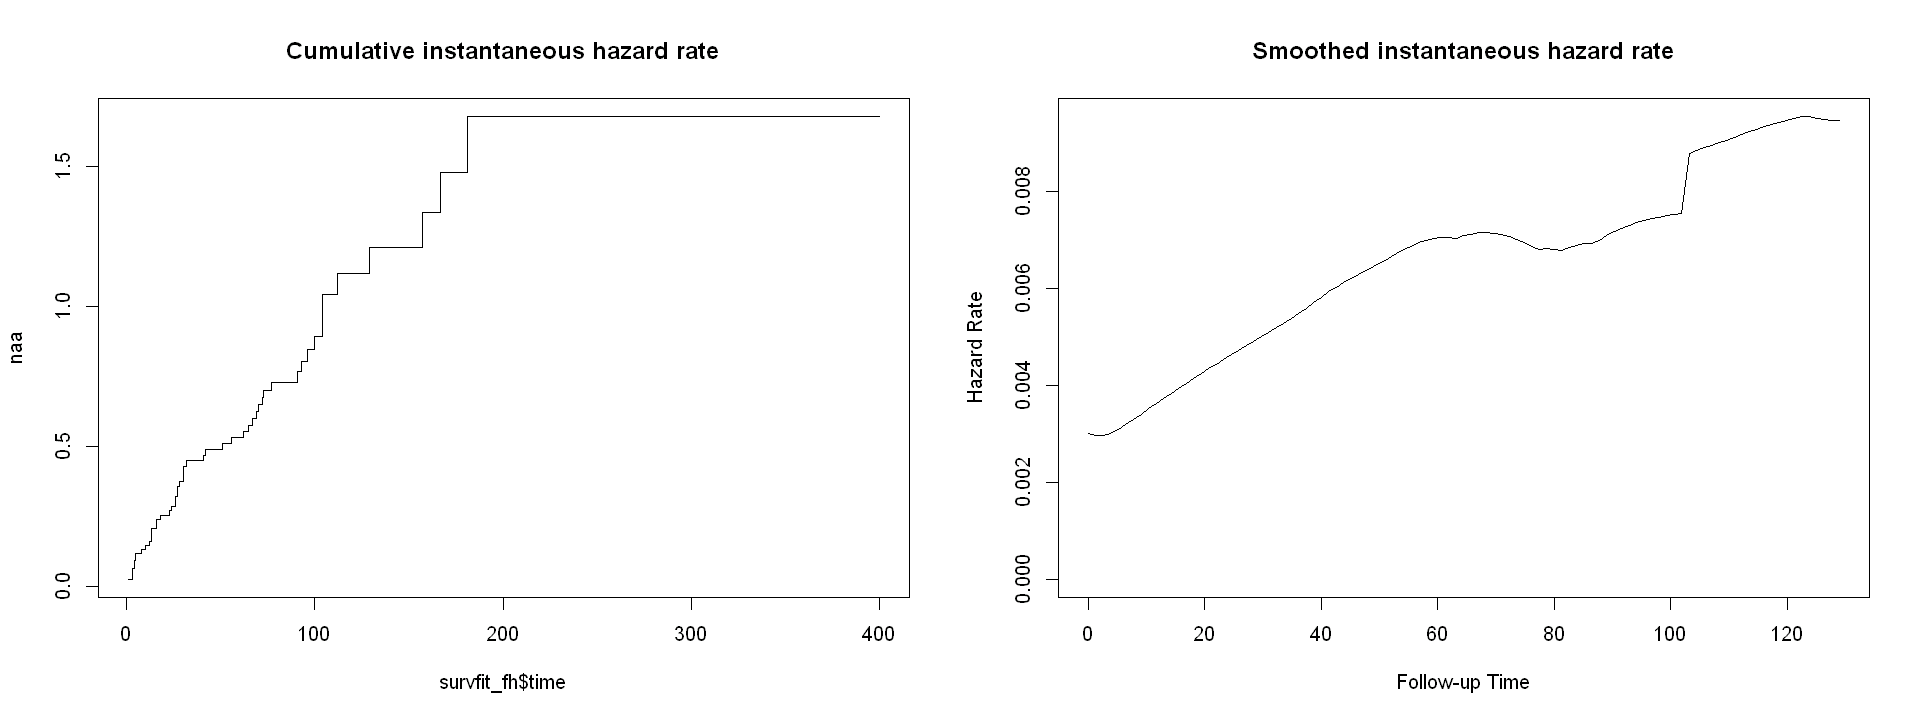

In [48]:
surv = Surv(tongue$time,tongue$delta)

survfit_fh <- survfit(surv~1, data = surv,conf.int=0.95, 
        type="fleming-harrington",
        conf.type="plain")

naa <- -log(survfit_fh$surv) 

muh <- muhaz(survfit_fh$time, survfit_fh$n.event==1) 

par(mfrow = c(1, 2)) 
options(repr.plot.width = 16, repr.plot.height = 6)

plot(survfit_fh$time,naa,type='s',main = "Cumulative instantaneous hazard rate")
plot(muh, main = "Smoothed instantaneous hazard rate")

#### Question 2 et 3: Hazard Plotting method to check adequacy to models (exponential, Weibull, Log-normalµ) 

**Création des models :**

In [49]:
# Transformation de la survie pour les modèles
time <- survfit_fh$time
survival_prob <- survfit_fh$surv

# Tracer la courbe de survie avec la transformation exponentielle
# Transformation pour Exponentielle : log(survival) vs time
exp_model <- lm(time ~ naa)

# Transformation pour Weibull : log(-log(survival)) vs log(time)
log_log_survival <- log(-log(survival_prob))
log_time <- log(time)
weibull_model <- lm(log_time ~ log_log_survival)

# Transformation pour Log-normal : log(survival) vs log(time)
norm_survival <- qnorm(survival_prob)
lognormal_model <- lm(log_time ~ norm_survival)

**Affichage des résultats :**

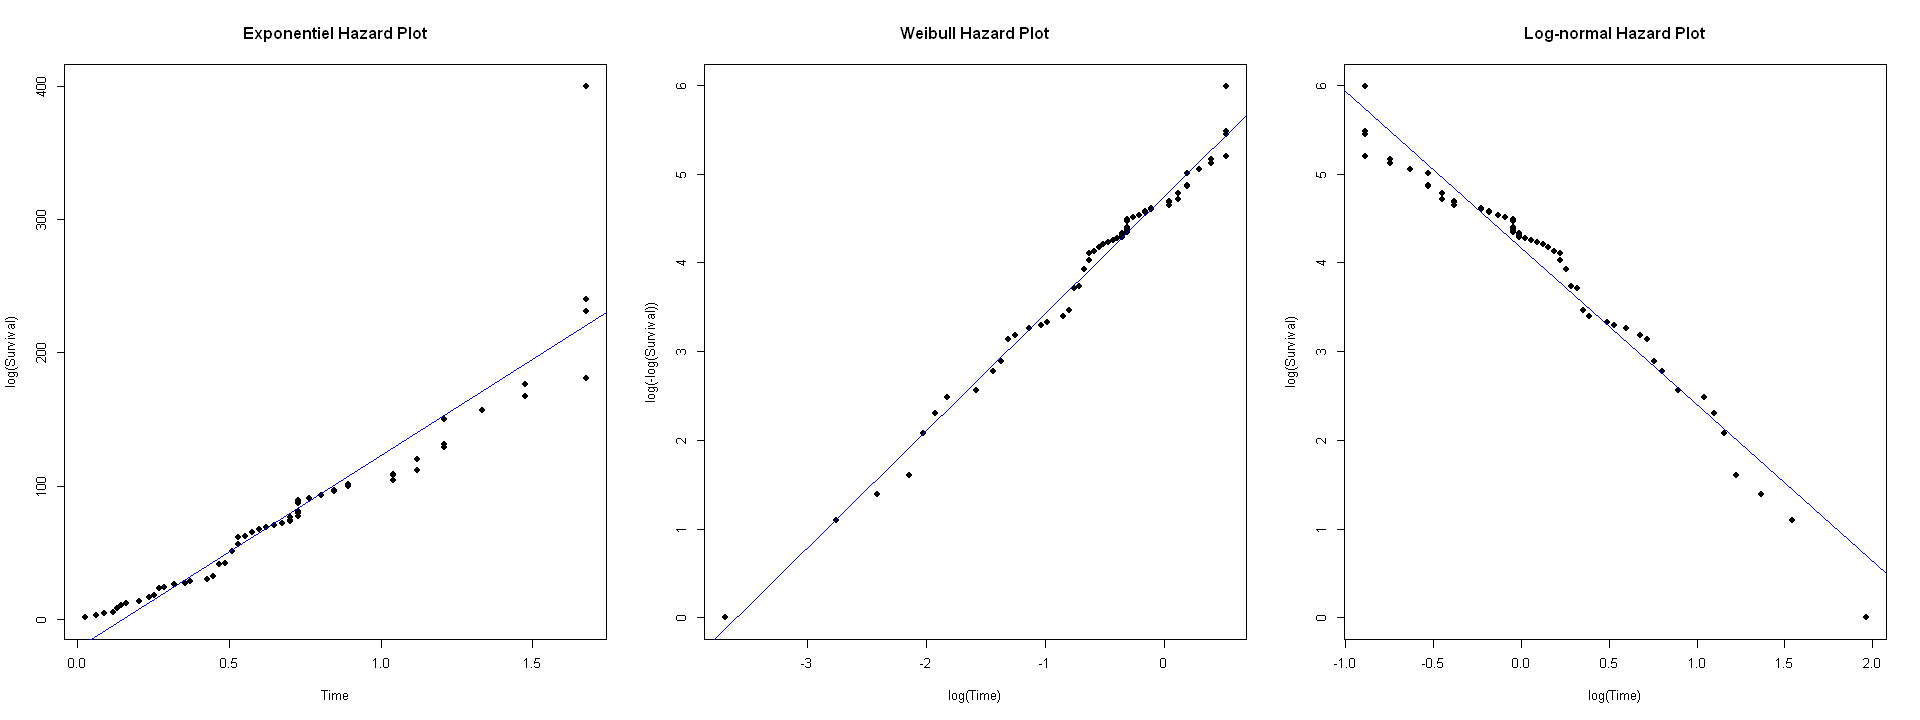

In [50]:
# Tracer les résultats
par(mfrow = c(1, 3)) 
options(repr.plot.width = 16, repr.plot.height = 6)

# Exponentiel - Tracer le graphique et ajouter la ligne y = x
plot(naa,time, main = "Exponentiel Hazard Plot", xlab = "Time", ylab = "log(Survival)", pch = 16)
abline(exp_model, col = "blue")

# Weibull - Tracer le graphique et ajouter la ligne y = x
plot(log_log_survival, log_time,main = "Weibull Hazard Plot", xlab = "log(Time)", ylab = "log(-log(Survival))", pch = 16)
abline(weibull_model, col = "blue")

# Log-normal - Tracer le graphique et ajouter la ligne y = x
plot(norm_survival, log_time, main = "Log-normal Hazard Plot", xlab = "log(Time)", ylab = "log(Survival)", pch = 16)
abline(lognormal_model, col = "blue")

In [51]:
print(paste("Model exp : ",summary(exp_model)$r.squared))
print(paste("Model weibull : ",summary(weibull_model)$r.squared))
print(paste("Model lognormal : ",summary(lognormal_model)$r.squared))

[1] "Model exp :  0.851466415195173"
[1] "Model weibull :  0.985358644872541"
[1] "Model lognormal :  0.959655011889547"


#### Question 3 : log-logistic

**Création du model :**

In [52]:
# Exemple de données
time <- survfit_fh$time
survival_prob <- survfit_fh$surv

# Transformation pour log-logistique
log_log_survival <- log(survival_prob/(1-survival_prob))
log_time <- log(time)

# Ajustement d'un modèle linéaire log-logistique
loglog_model <- lm(log_time ~ log_log_survival)

# Estimer les paramètres alpha et beta de la log-logistique à partir du modèle
alpha <- exp(coef(loglog_model)[1])  # Estimation de alpha
beta <- coef(loglog_model)[2]        # Estimation de beta


**Affichage des résultats :**

Estimated alpha:  65.59722 
Estimated beta:  -1.041825 
R2:  0.9705163

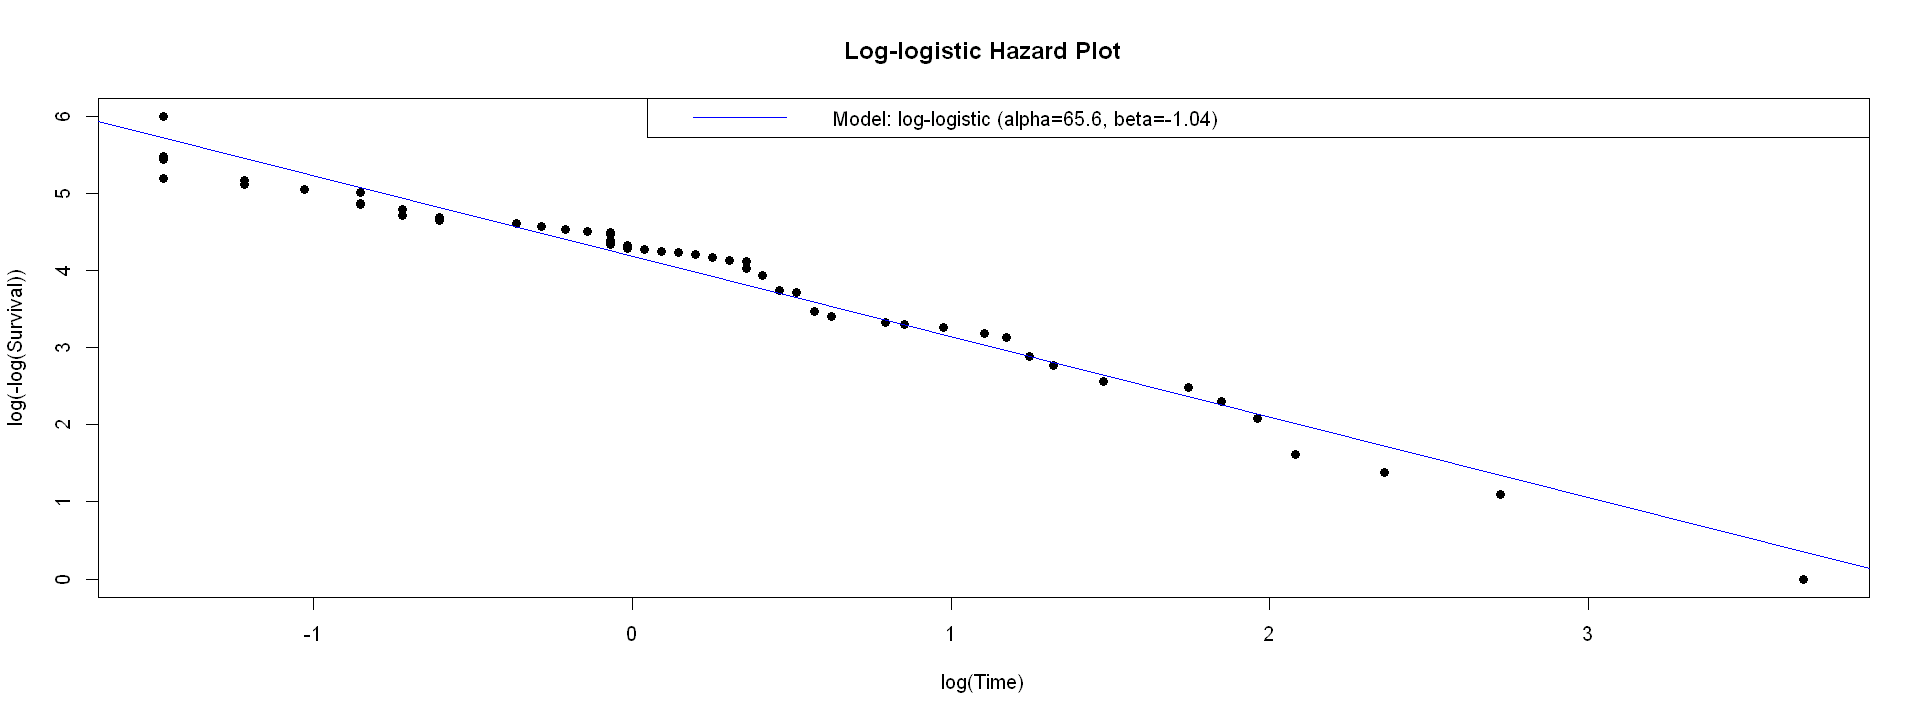

In [55]:
# Tracer la courbe de Hazard Plot (log-logistique)
par(mfrow = c(1, 1))
plot(log_log_survival, log_time, main = "Log-logistic Hazard Plot", 
     xlab = "log(Time)", ylab = "log(-log(Survival))", pch = 16)
abline(loglog_model, col = "blue")

# Ajouter une légende
legend("topright", legend = paste("Model: log-logistic (alpha=", round(alpha, 2), ", beta=", round(beta, 2), ")", sep=""), 
       col = "blue", lty = 1)

# Affichage des paramètres estimés
cat("Estimated alpha: ", alpha, "\n")
cat("Estimated beta: ", beta, "\n")
cat("R2: ",summary(loglog_model)$r.squared)

**Conclusion :**

- Le weibull model obtient les meilleurs résultats : R2 = 0.98. 

## Exercice 4

### Question 1 : télécharger les librairies 

In [56]:
library(MASS)

data(Melanoma)

head(Melanoma)

,time,status,sex,age,year,thickness,ulcer
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,10,3,1,76,1972,6.76,1
2,30,3,1,56,1968,0.65,0
3,35,2,1,41,1977,1.34,0
4,99,3,0,71,1968,2.90,0
5,185,1,1,52,1965,12.08,1
6,204,1,1,28,1971,4.84,1


### Question 2 :  Kaplan-Meier curves for males and females

**Attention :** censuré => code comme 1. 

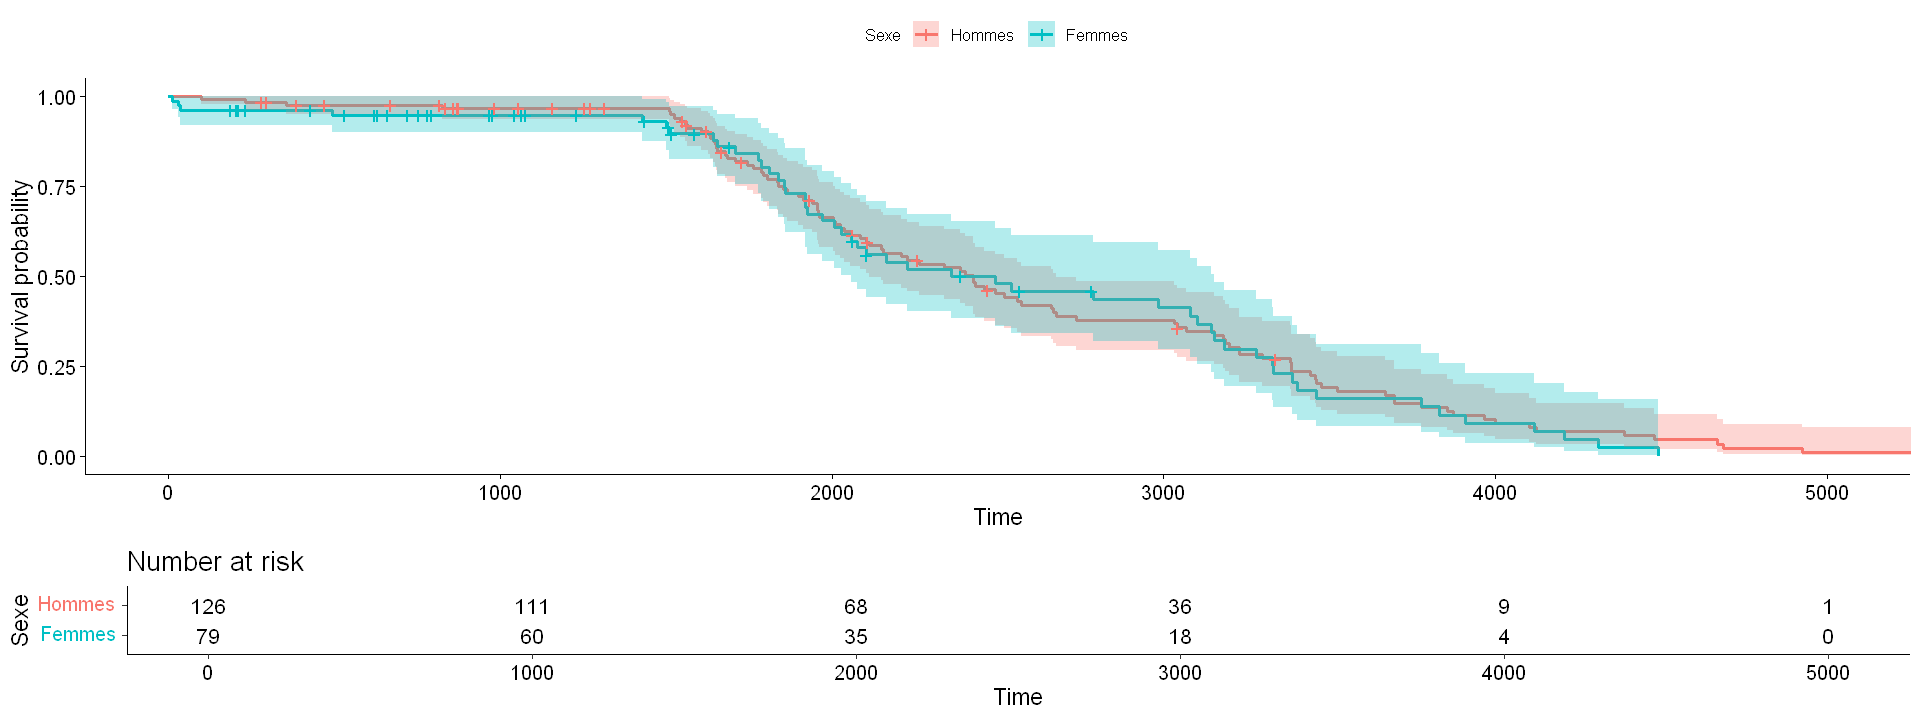

In [57]:
Melanoma$censure <- ifelse(Melanoma$status == 2 | Melanoma$status == 3, 1, 0)
surv = Surv(Melanoma$time,Melanoma$censure)

# On fait flemming-harrington pour avoir estimateur nelson-aalen
survfit_model <- survfit(surv ~ sex, data = Melanoma, conf.int = 0.95)


ggsurvplot(survfit_model, 
           conf.int = TRUE,             
           pval = FALSE,                   
           risk.table = TRUE,             # Ajouter un tableau des risques
           legend.title = "Sexe",         # Titre de la légende
           legend.labs = c("Hommes", "Femmes"))  # Labels de la légende

- Il ne semble pas y avoir de différence majeur entre les groupes. 

### Question 3 : significant difference between the distributions (log-rank, Gehan-Wilcoxon test)

[1] "Test log-rank"
Call:
survdiff(formula = surv ~ sex, data = Melanoma, rho = 0)

        N Observed Expected (O-E)^2/E (O-E)^2/V
sex=0 126       98    100.4    0.0578     0.184
sex=1  79       50     47.6    0.1220     0.184

 Chisq= 0.2  on 1 degrees of freedom, p= 0.7 
[1] "Test Gehan-Wilcoxon"
Call:
survdiff(formula = surv ~ sex, data = Melanoma, rho = 1)

        N Observed Expected (O-E)^2/E (O-E)^2/V
sex=0 126     51.4     51.9   0.00493     0.021
sex=1  79     27.2     26.7   0.00960     0.021

 Chisq= 0  on 1 degrees of freedom, p= 0.9 


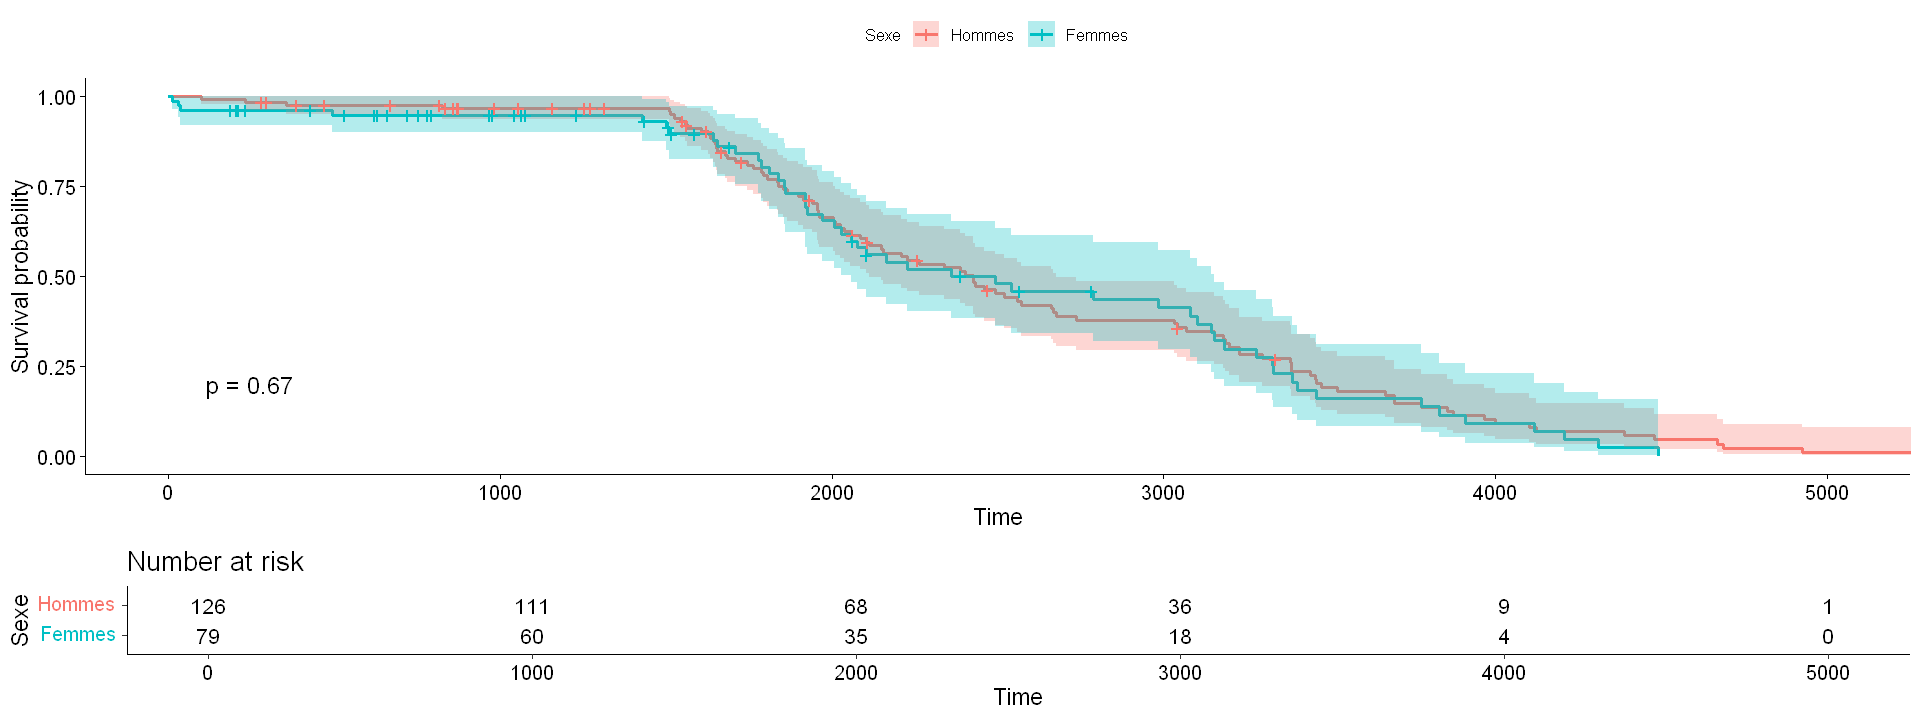

In [61]:
# Test de log-rank (test par défaut), test de différence significative entre les distributions
logrank_test <- survdiff(surv ~ sex, data = Melanoma,rho = 0)
print('Test log-rank')
print(logrank_test)

# Test de Gehan-Wilcoxon (rho = 1)
gehan_wilcoxon_test <- survdiff(surv ~ sex, data = Melanoma, rho = 1)
print('Test Gehan-Wilcoxon')
print(gehan_wilcoxon_test)


# Afficher la courbe de survie séparée par sexe avec p-value
ggsurvplot(survfit_model, 
           conf.int = TRUE,               # Ajouter les intervalles de confiance
           pval = TRUE,                   # Afficher la p-value
           risk.table = TRUE,             # Ajouter un tableau des risques
           legend.title = "Sexe",         # Titre de la légende
           legend.labs = c("Hommes", "Femmes"))  # Labels de la légende

- Log rank nous donne une p-valeur de 0.7 => pas de différence entre H et F.

- Gehan-Wilcoxon nous donne une p-valeur de 0.9 => pas de différence entre H et F.

- ggsurvplot nous donne une p-valeur de 0.67 => pas de différence entre H et F.  ggsurvplot fait un test de log-rank (la différence vient probablement d'un arrondi)

- Les différents tests nous permettent de conclure que l'on rejette l'hypothèse nulle d'une différence significative entre les deux distributions.

### Question 4 : Test if the survival distributions depend on covariables 

**Téléchargement du dataset :**

In [65]:
#install.packages('asaur')
library(asaur)

In [66]:
data(prostateSurvival)
head(prostateSurvival)

,grade,stage,ageGroup,survTime,status
,<fct>,<fct>,<fct>,<int>,<int>
1,mode,T1c,80+,18,0
2,mode,T1ab,75-79,23,0
3,poor,T1c,75-79,37,0
4,mode,T2,70-74,27,0
5,mode,T1c,70-74,42,0
6,poor,T2,75-79,38,2


In [67]:
unique(prostateSurvival$status)

[1] 0 2 1

**Etude de la covariable stage :**

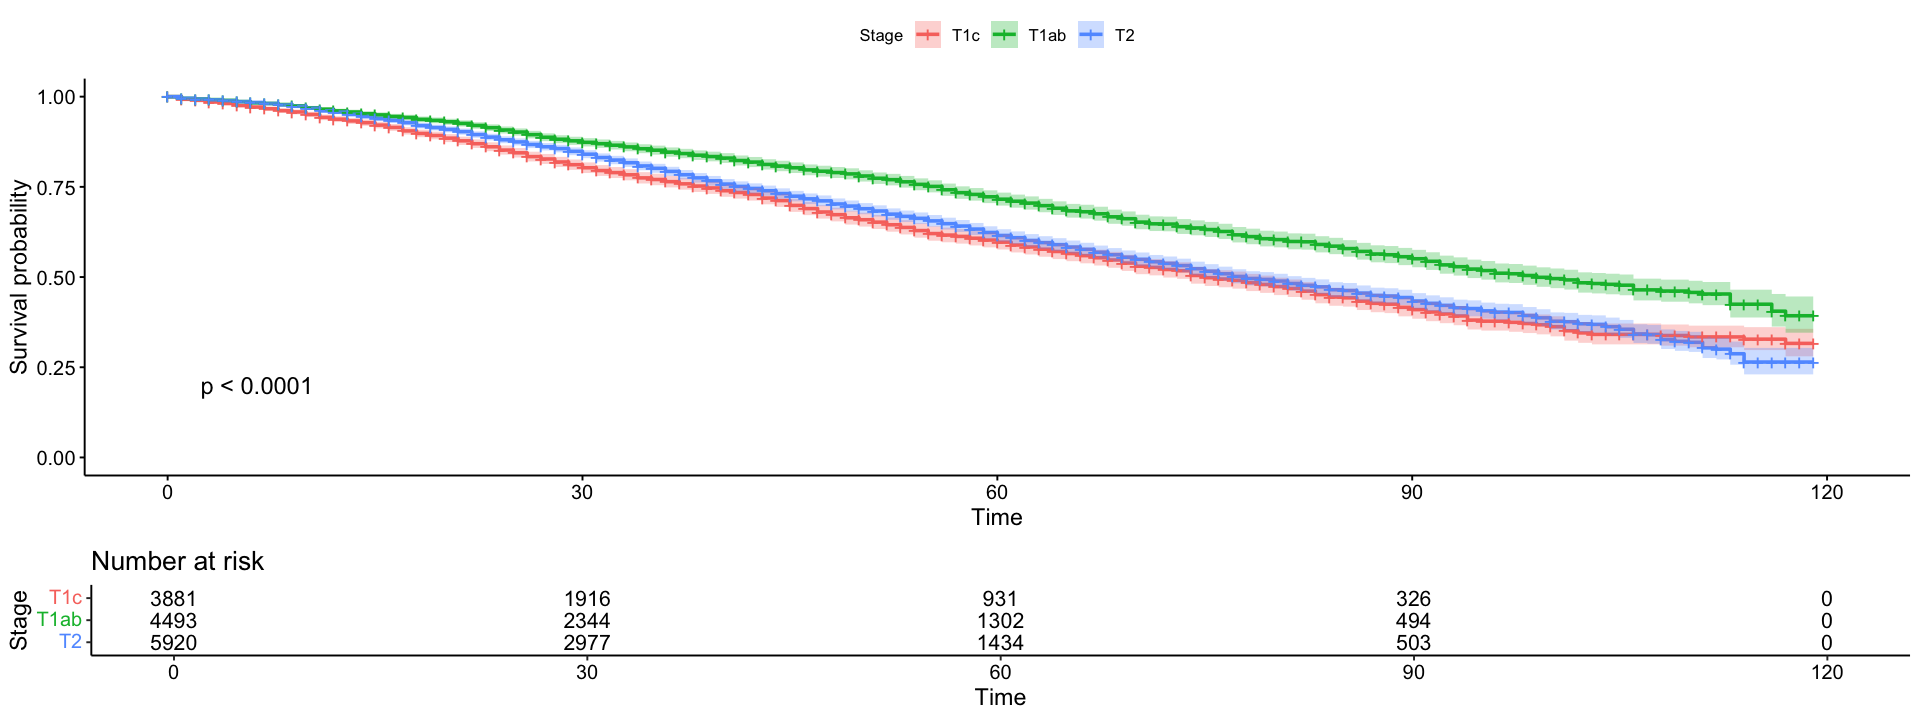

In [170]:
prostateSurvival$censure <- ifelse(prostateSurvival$status == 2 | prostateSurvival$status == 1, 1, 0)
surv = Surv(prostateSurvival$survTime,prostateSurvival$censure)

# On fait flemming-harrington pour avoir estimateur nelson-aalen
survfit_model <- survfit(surv ~ stage, data = prostateSurvival, conf.int = 0.95)


ggsurvplot(survfit_model, 
           conf.int = TRUE,             
           pval = TRUE,                   
           risk.table = TRUE,             # Ajouter un tableau des risques
           legend.title = "Stage",         # Titre de la légende
           legend.labs = unique(prostateSurvival$stage))  # Labels de la légende

- Le stade a une influence significative sur al durée de vie.

**Etude de la covariable age :**

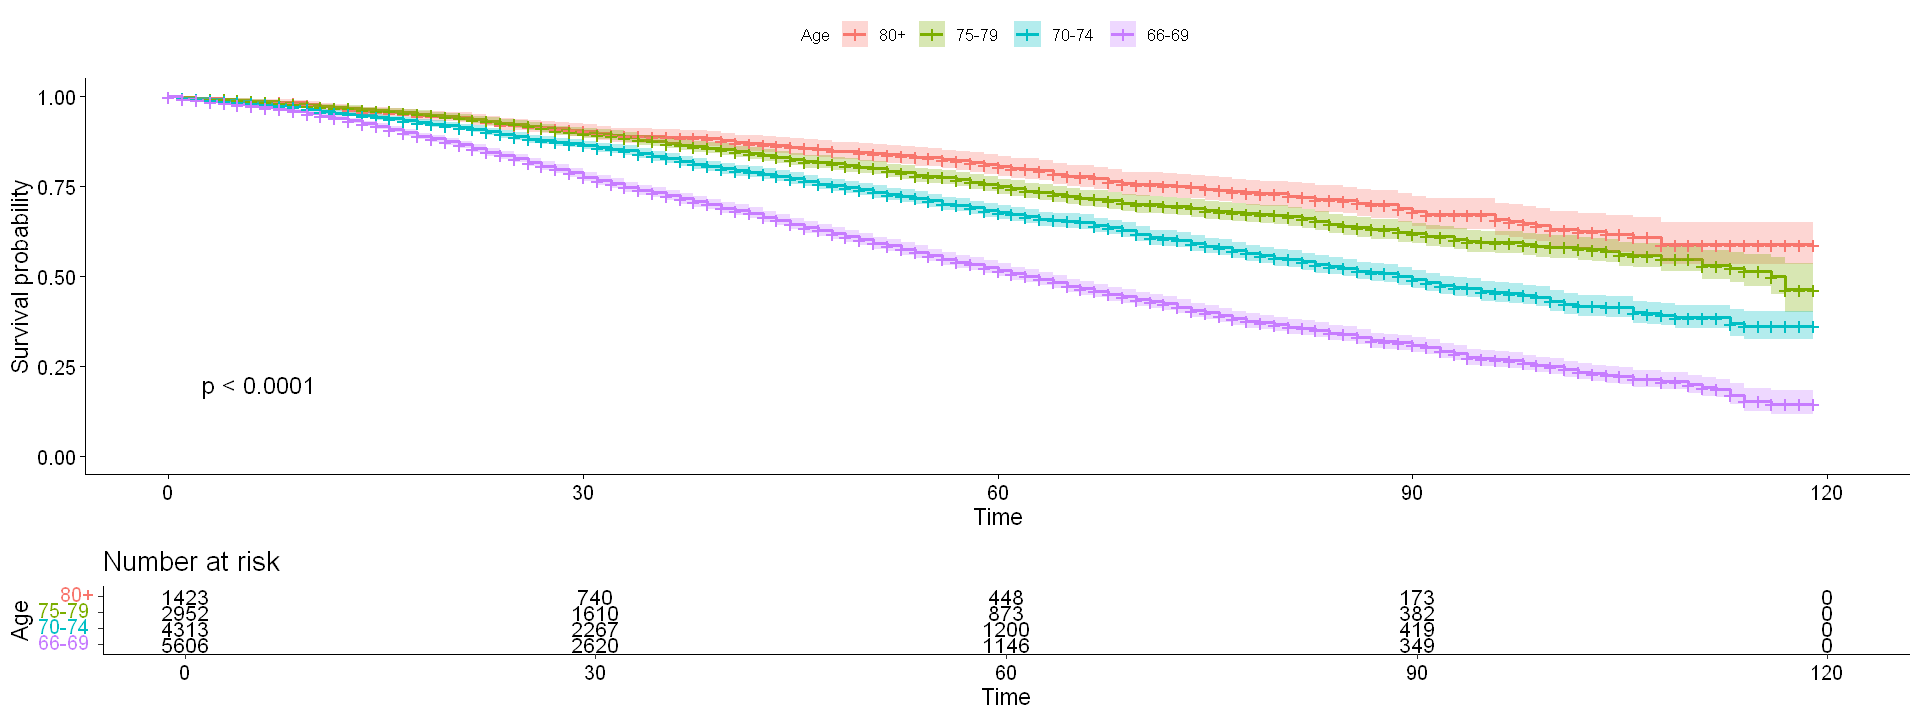

In [68]:
# Création de groupes d'âges 
prostateSurvival$censure <- ifelse(prostateSurvival$status == 2 | prostateSurvival$status == 1, 1, 0)

surv = Surv(prostateSurvival$survTime,prostateSurvival$censure)

# On fait flemming-harrington pour avoir estimateur nelson-aalen
survfit_model <- survfit(surv ~ ageGroup, data = prostateSurvival, conf.int = 0.95)


ggsurvplot(survfit_model, 
           conf.int = TRUE,             
           pval = TRUE,                   
           risk.table = TRUE,             # Ajouter un tableau des risques
           legend.title = "Age",         # Titre de la légende
           legend.labs = unique(prostateSurvival$ageGroup))  # Labels de la légende

- L'age a aussi un impacte significatif sur la durée de vie. 